# Business Understanding

Dalam era digital yang terus berkembang pesat, pemahaman yang kuat tentang industri dan pasar merupakan kunci keberhasilan bagi setiap perusahaan. Dalam upaya untuk mencapai tujuan bisnis yang berkelanjutan, pengetahuan yang mendalam tentang tren pasar, perilaku konsumen, dan analisis data menjadi sangat penting. Dengan pemahaman yang mendalam tentang dinamika industri dan kebutuhan pasar, perusahaan dapat mengidentifikasi peluang baru, mengatasi tantangan, dan mengembangkan strategi pemasaran yang efektif. Dalam konteks ini, integrasi antara analisis data yang cermat dan pemahaman yang mendalam tentang pasar menjadi landasan yang kokoh untuk mencapai kesuksesan bisnis yang berkelanjutan.

Melakukan analisis data CRM dengan tujuan meningkatkan layanan dan membuat pelanggan tetap tertarik dengan produk kita sekaligus menarik pelanggan baru menjadi kunci kesuksesan bisnis perusahaan.

Sehingga muncul permasalahan sebagai berikut:
1. Bagaimana karakteristik pelanggan saat membeli produk?
2. Bagaimana kinerja tim penjualan?
3. Seperti apa tren penjualan perusahaan?
4. Apakah ada produk yang berpotensi untuk menjadi produk unggulan atau apakah ada produk yang memiliki nilai jual kurang?

# Data Understanding

Dataset yang digunakan merupakan dataset sistem CRM dari perusahaan fiktif yang dibuat untuk membantu memahami proses analisis penjualan.

Dataset terdiri dari fitur utama:
- Customer information (demographucs, firmographicsm etc.)
- Sales activities
- Oppurtunity data (deal size, stage, probability, etc.)
- Product/service information
- Sales team and performance metrics
- Time-series data (daily/weekly/monthly sales, etc.)

Sumber dataset: https://www.kaggle.com/datasets/innocentmfa/crm-sales-opportunities?select=accounts.csv

In [1]:
# library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter
import calendar
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

# optional setting
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_column',None)

In [2]:
path = 'D:\\MYPORTO\\CRM Sales opportunities\\data' # dataset path

# read dataset
accounts = pd.read_csv(os.path.join(path,'accounts.csv'))
data_dictionary = pd.read_csv(os.path.join(path,'data_dictionary.csv'))
products = pd.read_csv(os.path.join(path,'products.csv'))
sales_pipeline = pd.read_csv(os.path.join(path,'sales_pipeline.csv'))
sales_teams = pd.read_csv(os.path.join(path,'sales_teams.csv'))

In [3]:
accounts.head()

,account,sector,year_established,revenue,employees,office_location,subsidiary_of
0,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN
1,Betasoloin,medical,1999,251.41,495,United States,NaN
2,Betatech,medical,1986,647.18,1185,Kenya,NaN
3,Bioholding,medical,2012,587.34,1356,Philipines,NaN
4,Bioplex,medical,1991,326.82,1016,United States,NaN


In [4]:
accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   account           85 non-null     object 
 1   sector            85 non-null     object 
 2   year_established  85 non-null     int64  
 3   revenue           85 non-null     float64
 4   employees         85 non-null     int64  
 5   office_location   85 non-null     object 
 6   subsidiary_of     15 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.8+ KB


In [5]:
products

,product,series,sales_price
0,GTX Basic,GTX,550
1,GTX Pro,GTX,4821
2,MG Special,MG,55
3,MG Advanced,MG,3393
4,GTX Plus Pro,GTX,5482
5,GTX Plus Basic,GTX,1096
6,GTK 500,GTK,26768


In [6]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product      7 non-null      object
 1   series       7 non-null      object
 2   sales_price  7 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 300.0+ bytes


In [7]:
sales_pipeline.head()

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0


In [8]:
sales_pipeline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   opportunity_id  8800 non-null   object 
 1   sales_agent     8800 non-null   object 
 2   product         8800 non-null   object 
 3   account         7375 non-null   object 
 4   deal_stage      8800 non-null   object 
 5   engage_date     8300 non-null   object 
 6   close_date      6711 non-null   object 
 7   close_value     6711 non-null   float64
dtypes: float64(1), object(7)
memory usage: 550.1+ KB


In [9]:
sales_teams.head()

,sales_agent,manager,regional_office
0,Anna Snelling,Dustin Brinkmann,Central
1,Cecily Lampkin,Dustin Brinkmann,Central
2,Versie Hillebrand,Dustin Brinkmann,Central
3,Lajuana Vencill,Dustin Brinkmann,Central
4,Moses Frase,Dustin Brinkmann,Central


In [10]:
sales_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sales_agent      35 non-null     object
 1   manager          35 non-null     object
 2   regional_office  35 non-null     object
dtypes: object(3)
memory usage: 972.0+ bytes


In [11]:
data_dictionary

,Table,Field,Description
0,accounts,account,Company name
1,accounts,sector,Industry
2,accounts,year_established,Year Established
3,accounts,revenue,Annual revenue (in millions of USD)
4,accounts,employees,Number of employees
5,accounts,office_location,Headquarters
6,accounts,subsidiary_of,Parent company
7,products,product,Product name
8,products,series,Product series
9,products,sales_price,Suggested retail price


# Data Proprocessing

## Drop Duplicates

In [12]:
accounts[accounts.duplicated(subset = ['account','sector'],keep = 'last')]

,account,sector,year_established,revenue,employees,office_location,subsidiary_of


Tabel `accounts` tidak terdapat data duplikat.

In [13]:
sales_pipeline[sales_pipeline.duplicated(subset = 'opportunity_id',keep = 'last')]

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value


Tabel `sales_pipeline` tidak terdapat data duplikat.

In [14]:
sales_teams[sales_teams.duplicated(subset = ['sales_agent','manager'], keep = 'last')]

,sales_agent,manager,regional_office


Tabel `sales_teams` tidak terdapat data duplikat.

## Missing Value

In [15]:
accounts.isna().sum()

account              0
sector               0
year_established     0
revenue              0
employees            0
office_location      0
subsidiary_of       70
dtype: int64

In [16]:
accounts[~accounts['subsidiary_of'].isna()]

,account,sector,year_established,revenue,employees,office_location,subsidiary_of
6,Bluth Company,technolgy,1993,1242.32,3027,United States,Acme Corporation
9,Cheers,entertainment,1993,4269.90,6472,United States,Massive Dynamic
10,Codehow,software,1998,2714.90,2641,United States,Acme Corporation
13,Dalttechnology,software,2013,98.79,96,United States,Bubba Gump
14,dambase,marketing,1995,2173.98,2928,United States,Inity
17,Donquadtech,technolgy,1992,1712.68,3194,United States,Acme Corporation
21,Faxquote,telecommunications,1995,1825.82,5595,United States,Sonron
24,Funholding,finance,1991,2819.50,7227,United States,Golddex
29,Gogozoom,telecommunications,2007,86.68,187,United States,Sonron
39,Iselectrics,technolgy,2011,527.11,1428,United States,Acme Corporation


In [17]:
accounts[accounts['account']=='Acme Corporation']

,account,sector,year_established,revenue,employees,office_location,subsidiary_of
0,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN


Missing value pada fitur `subsidiary_of` menunjukan jika perusahaan tersebut tidak memiliki perusahaan induk. Sehingga fitur ini tetap dibiarkan karena tidak akan berpengaruh pada analisis.

In [18]:
sales_pipeline.isna().sum()

opportunity_id       0
sales_agent          0
product              0
account           1425
deal_stage           0
engage_date        500
close_date        2089
close_value       2089
dtype: int64

In [19]:
sales_pipeline[sales_pipeline['account'].isna()]['deal_stage'].unique()

array(['Engaging', 'Prospecting'], dtype=object)

In [20]:
sales_pipeline[sales_pipeline['engage_date'].isna()]['deal_stage'].unique()

array(['Prospecting'], dtype=object)

In [21]:
sales_pipeline[sales_pipeline['close_date'].isna()]['deal_stage'].unique()

array(['Engaging', 'Prospecting'], dtype=object)

In [22]:
sales_pipeline[sales_pipeline['close_value'].isna()]['deal_stage'].unique()

array(['Engaging', 'Prospecting'], dtype=object)

Diperoleh informasi sebagai berikut:
1. Missing value pada fitur `account` terjadi karena proses penjualan masih di tahap `engaging` yang artinya perusahaan baru saja menarik customer baru sehingga data perusahaan tujuan tidak ada dalam dataset. Sementara proses penjualan yang masih di tahap `Prospecting` artinya penjualan masih dalam proses pencarian customer.
2. Missing value pada fitur `engage_date` terjadi karena proses penjualan masih di tahap `Prospecting` yang artinya penjualan masih dalam proses pencarian customer.
3. Missing value pada fitur `close_date` terjadi karena proses penjualan masih di tahap `engaging`. Sementara, kasus lain terjadi karena proses penjualan masih dalam tahap `Prospecting`. Sehingga belum adanya tanggal ditetapkannya kesepakatan penjualan antar kedua pihak.
4. Missing value pada fitur `close_value` terjadi karena proses penjualan masih di tahap `engaging`. Sementara, kasus lain terjadi karena proses penjualan masih dalam tahap `Prospecting`. Sehingga belum adanya jumlah pendapatan dari hasil kesepakatan penjualan.

Berdarkan informasi di atas, missing value yang terjadi di data `sales_pipeline` tidak perlu diolah karena kekosongan data dianggap wajar karena kondisi transaksi.

## Cek Kesesuaian Tiap Fitur

### accounts

In [23]:
accounts.head(2)

,account,sector,year_established,revenue,employees,office_location,subsidiary_of
0,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN
1,Betasoloin,medical,1999,251.41,495,United States,NaN


In [24]:
accounts.describe().T

,count,mean,std,min,25%,50%,75%,max
year_established,85.0,1996.105882,8.865427,1979.00,1989.00,1996.00,2002.00,2017.00
revenue,85.0,1994.632941,2169.491436,4.54,497.11,1223.72,2741.37,11698.03
employees,85.0,4660.823529,5715.601198,9.00,1179.00,2769.00,5595.00,34288.00


In [25]:
accounts.sector.unique()

array(['technolgy', 'medical', 'retail', 'software', 'entertainment',
       'marketing', 'telecommunications', 'finance', 'employment',
       'services'], dtype=object)

In [26]:
accounts.office_location.unique()

array(['United States', 'Kenya', 'Philipines', 'Japan', 'Italy', 'Norway',
       'Korea', 'Jordan', 'Brazil', 'Germany', 'Panama', 'Belgium',
       'Romania', 'Poland', 'China'], dtype=object)

In [27]:
accounts.subsidiary_of.unique()

array([nan, 'Acme Corporation', 'Massive Dynamic', 'Bubba Gump', 'Inity',
       'Sonron', 'Golddex', 'Warephase'], dtype=object)

### sales_pipeline

In [28]:
sales_pipeline.head(2)

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0


In [29]:
sales_pipeline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   opportunity_id  8800 non-null   object 
 1   sales_agent     8800 non-null   object 
 2   product         8800 non-null   object 
 3   account         7375 non-null   object 
 4   deal_stage      8800 non-null   object 
 5   engage_date     8300 non-null   object 
 6   close_date      6711 non-null   object 
 7   close_value     6711 non-null   float64
dtypes: float64(1), object(7)
memory usage: 550.1+ KB


In [30]:
sales_pipeline.describe().T

,count,mean,std,min,25%,50%,75%,max
close_value,6711.0,1490.915512,2320.670773,0.0,0.0,472.0,3225.0,30288.0


In [31]:
sales_pipeline[sales_pipeline['close_value']==0]['deal_stage'].unique()

array(['Lost'], dtype=object)

In [32]:
sales_pipeline.sales_agent.unique()

array(['Moses Frase', 'Darcel Schlecht', 'Zane Levy', 'Anna Snelling',
       'Vicki Laflamme', 'Markita Hansen', 'Niesha Huffines',
       'James Ascencio', 'Gladys Colclough', 'Maureen Marcano',
       'Hayden Neloms', 'Rosalina Dieter', 'Versie Hillebrand',
       'Daniell Hammack', 'Elease Gluck', 'Violet Mclelland',
       'Kami Bicknell', 'Rosie Papadopoulos', 'Kary Hendrixson',
       'Reed Clapper', 'Wilburn Farren', 'Garret Kinder',
       'Marty Freudenburg', 'Cassey Cress', 'Lajuana Vencill',
       'Boris Faz', 'Donn Cantrell', 'Corliss Cosme', 'Cecily Lampkin',
       'Jonathan Berthelot'], dtype=object)

In [33]:
sales_pipeline['product'].unique()

array(['GTX Plus Basic', 'GTXPro', 'MG Special', 'GTX Basic',
       'MG Advanced', 'GTX Plus Pro', 'GTK 500'], dtype=object)

In [34]:
for i in range(len(sales_pipeline)):
    if sales_pipeline['product'][i] == 'GTXPro':
        sales_pipeline['product'][i] = 'GTX Pro'
    else:
        pass

In [35]:
sales_pipeline.deal_stage.unique()

array(['Won', 'Engaging', 'Lost', 'Prospecting'], dtype=object)

In [36]:
print('Tipe data sebelum:')
print('engage_date: ',sales_pipeline['engage_date'].dtype)
print('close_date: ',sales_pipeline['close_date'].dtype)
for col in ['engage_date','close_date']:
    sales_pipeline[col] = pd.to_datetime(sales_pipeline[col])

print('\nTipe data setelah:')
print('engage_date: ',sales_pipeline['engage_date'].dtype)
print('close_date: ',sales_pipeline['close_date'].dtype)

Tipe data sebelum:
engage_date:  object
close_date:  object

Tipe data setelah:
engage_date:  datetime64[ns]
close_date:  datetime64[ns]


In [37]:
# membuat fitur profit
# profit = close_value - sales_price(products)
sales_pipeline2 = sales_pipeline.merge(products, on = 'product', how = 'left')

profit = []
for i in range(len(sales_pipeline2)):
    if sales_pipeline2['deal_stage'][i] == 'Won':
        profit.append(sales_pipeline2['close_value'][i] - sales_pipeline2['sales_price'][i])
    else:
        profit.append(0)

sales_pipeline2['profit'] = profit

In [38]:
# membuat fitur deal_day
# deal_day = close_date - engage_date

sales_pipeline2['deal_day'] = (sales_pipeline2['close_date']-sales_pipeline2['engage_date']).dt.days
sales_pipeline2 = sales_pipeline2[['opportunity_id','sales_agent','product','account','deal_stage','engage_date','close_date','deal_day','close_value','profit']]

In [39]:
sales_pipeline2.head()

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,deal_day,close_value,profit
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,132.0,1054.0,-42.0
1,Z063OYW0,Darcel Schlecht,GTX Pro,Isdom,Won,2016-10-25,2017-03-11,137.0,4514.0,-307.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,133.0,50.0,-5.0
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,135.0,588.0,38.0
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,128.0,517.0,-33.0


# Exploratory Data Analysis

## Univariate Analysis

In [40]:
sales_pipeline2.describe().T

,count,mean,min,25%,50%,75%,max,std
engage_date,8300,2017-06-14 08:35:06.216867584,2016-10-20 00:00:00,2017-04-04 00:00:00,2017-06-24 00:00:00,2017-08-27 00:00:00,2017-12-27 00:00:00,NaN
close_date,6711,2017-08-01 03:32:25.641484032,2017-03-01 00:00:00,2017-05-18 00:00:00,2017-08-02 00:00:00,2017-10-18 00:00:00,2017-12-31 00:00:00,NaN
deal_day,6711.0,47.985397,1.0,8.0,45.0,85.0,138.0,41.057665
close_value,6711.0,1490.915512,0.0,0.0,472.0,3225.0,30288.0,2320.670773
profit,8800.0,-2.039545,-3022.0,0.0,0.0,0.0,3520.0,229.949177


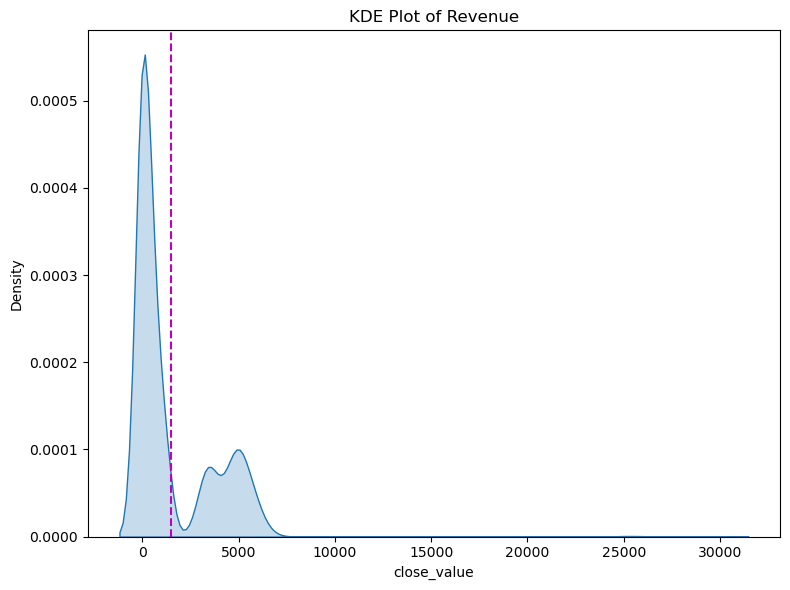

In [41]:
plt.figure(figsize = (8,6))
ax = sns.kdeplot(data = sales_pipeline2,x = 'close_value', fill = True)
ylim = ax.get_ylim()
ax.plot([sales_pipeline2['close_value'].mean(),sales_pipeline2['close_value'].mean()], ax.get_ylim(), linestyle = '--', color = 'm')
ax.set_ylim(ylim)
plt.title('KDE Plot of Revenue')
plt.tight_layout()
plt.show()

In [42]:
won_deal = sales_pipeline2[sales_pipeline2['deal_stage'] == 'Won'].reset_index(drop=True)
won_deal.describe().T

,count,mean,min,25%,50%,75%,max,std
engage_date,4238,2017-06-09 12:50:58.046248192,2016-10-20 00:00:00,2017-03-25 00:00:00,2017-06-12 00:00:00,2017-09-01 00:00:00,2017-12-27 00:00:00,NaN
close_date,4238,2017-07-31 07:37:00.481359360,2017-03-01 00:00:00,2017-05-18 00:00:00,2017-08-02 00:00:00,2017-10-16 00:00:00,2017-12-31 00:00:00,NaN
deal_day,4238.0,51.781973,1.0,9.0,57.0,88.0,138.0,41.171603
close_value,4238.0,2360.909391,38.0,518.0,1117.0,4429.5,30288.0,2544.484463
profit,4238.0,-4.235017,-3022.0,-82.0,-1.0,64.75,3520.0,331.360621


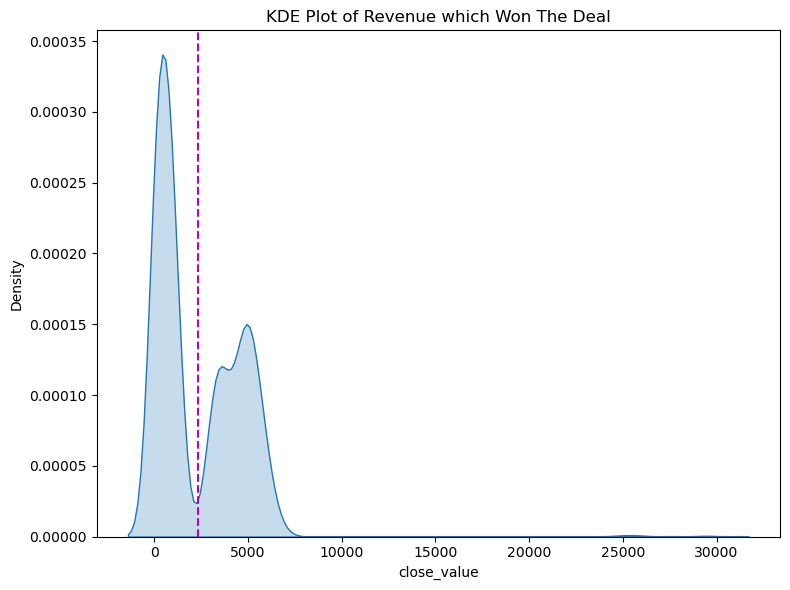

In [43]:
# kde plot of revenue which won the deal
plt.figure(figsize = (8,6))
ax = sns.kdeplot(data = won_deal,x = 'close_value', fill = True)
ylim = ax.get_ylim()
ax.plot([won_deal['close_value'].mean(),won_deal['close_value'].mean()], ax.get_ylim(), linestyle = '--', color = 'm')
ax.set_ylim(ylim)
plt.title('KDE Plot of Revenue which Won The Deal')
plt.tight_layout()
plt.show()

**KDE Plot 1** digunakan untuk menggambarkan distribusi revenue atau `close_value` keseluruhan data. Namun karena terdapat nilai 0 yang mana terjadi karena data tersebut merupakan gagal dalam kesepakatan pembelian. **KDE Plot 2** merupakan gambaran distribusi revenue atau `close_value` yang telah di filter hanya data pembelian yang telah disepakati.

Terlihat bahwa pada KDE Plot 2 sebaran revenue mengalami skewed positif, seperti yang dibuktikan pada tabel statistik deskriptif dimana nilai mean (2360.91) lebih besar dari nilai median (1117.0). Hal ini menunjukan jika revenue memiliki outlier atau beberapa nilai yang terlampau besar dengan sebaran data yang relatif kecil.

Selain itu dapat dilihat juga nilai standar deviasi (2544.48) lebih besar dari nilai mean (2360.91) yang menandakan banyak variasi dalam data. Hal ini mungkin terjadi karena revenue yang dihasilkan berasal dari beragam produk dengan harga berbeda atau disebabkan faktor lain. Sehingga tidak bisa dikatakan jika kondisi ini merupakan kondisi yang buruk.

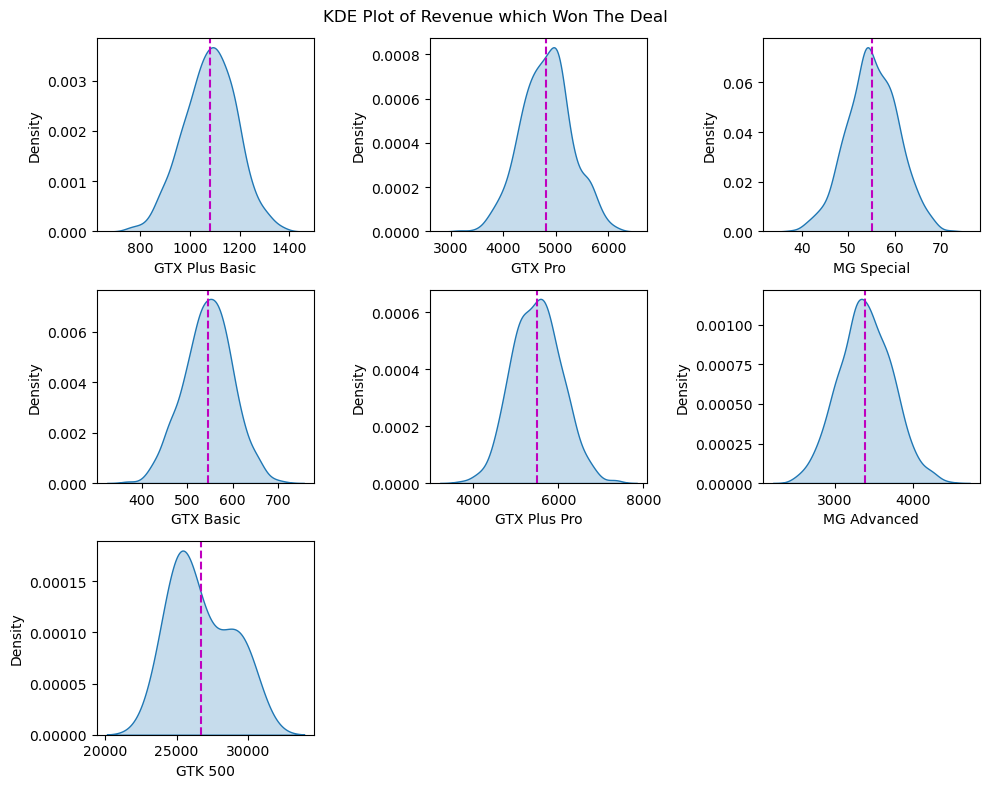

In [44]:
# kde plot of revenue which won the deal based on products
fig, axes = plt.subplots(ncols = 3, nrows = 3, figsize = (10,8), layout = 'constrained')
for product, ax in zip(won_deal['product'].unique(), axes.flat):
    plot = sns.kdeplot(ax = ax, data = won_deal[won_deal['product']==product], x = 'close_value', fill = True)
    ylim = plot.get_ylim()
    plot.plot([won_deal[won_deal['product']==product]['close_value'].mean(),won_deal[won_deal['product']==product]['close_value'].mean()], plot.get_ylim(), linestyle = '--', color = 'm')
    plot.set_ylim(ylim)
    plot.set_xlabel(product)
fig.delaxes(axes[2,1])
fig.delaxes(axes[2,2])
plt.suptitle('KDE Plot of Revenue which Won The Deal')
plt.tight_layout()
plt.show()

Apablia dilihat berdasarkan jenis produk yang terjual, ternyata distribusi revenue cenderung normal.

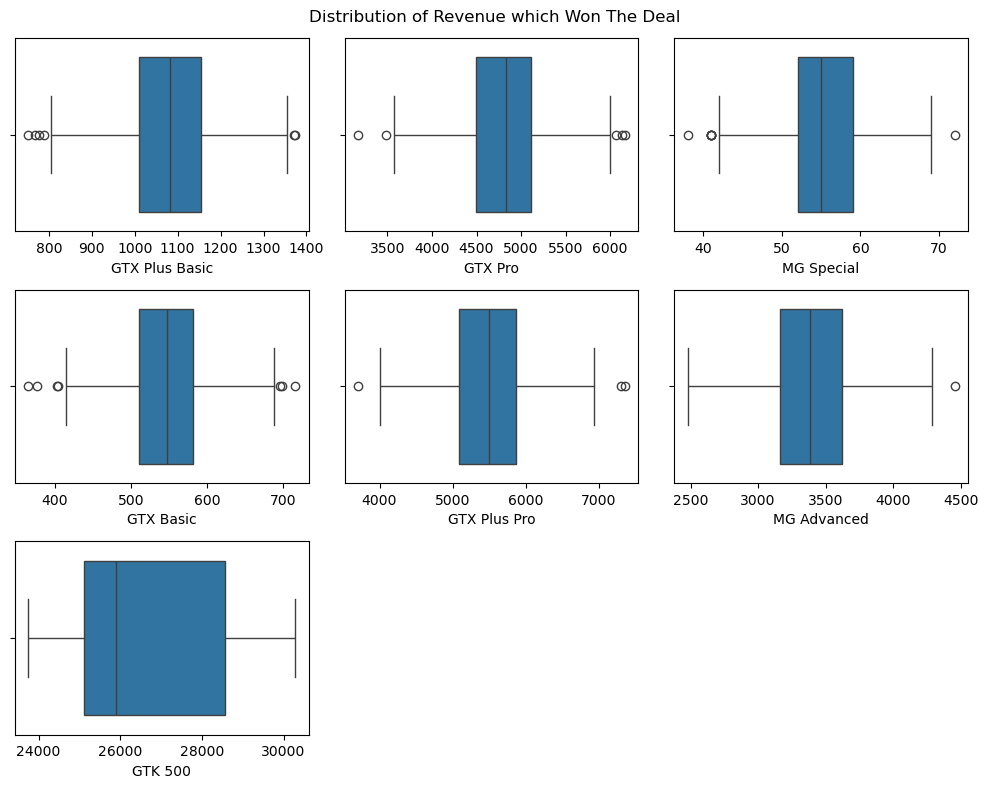

In [45]:
# boxplot revenue which won the deal based on products
fig, axes = plt.subplots(ncols = 3, nrows = 3, figsize = (10,8), layout = 'constrained')
for product, ax in zip(won_deal['product'].unique(), axes.flat):
    plot = sns.boxplot(ax = ax, data = won_deal[won_deal['product']==product],x = 'close_value')
    plot.set_xlabel(product)
fig.delaxes(axes[2,1])
fig.delaxes(axes[2,2])
plt.suptitle('Distribution of Revenue which Won The Deal')
plt.tight_layout()
plt.show()

In [46]:
def iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)

  IQR = Q3 - Q1

  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR

  print('-'*30)
  print(f'{column}\n')
  print('IQR:',IQR)
  print('Lower Bound:',lower,'| Jumlah data:',np.array(df[column] < lower).sum())
  print('Upper Bound:',upper,'| Jumlah data:',np.array(df[column] > upper).sum())
  print('Total outliers:',(np.array(df[column] < lower).sum() + np.array(df[column] > upper).sum()))
  print('-'*30,'\n')

In [47]:
# IQR, lower bound, upper bound
for product in won_deal['product'].unique():
    df = won_deal[won_deal['product']==product]

    print(product)
    iqr(df,'close_value')

GTX Plus Basic
------------------------------
close_value

IQR: 144.0
Lower Bound: 795.0 | Jumlah data: 4
Upper Bound: 1371.0 | Jumlah data: 2
Total outliers: 6
------------------------------ 

GTX Pro
------------------------------
close_value

IQR: 615.0
Lower Bound: 3569.5 | Jumlah data: 2
Upper Bound: 6029.5 | Jumlah data: 3
Total outliers: 5
------------------------------ 

MG Special
------------------------------
close_value

IQR: 7.0
Lower Bound: 41.5 | Jumlah data: 6
Upper Bound: 69.5 | Jumlah data: 1
Total outliers: 7
------------------------------ 

GTX Basic
------------------------------
close_value

IQR: 71.0
Lower Bound: 404.5 | Jumlah data: 4
Upper Bound: 688.5 | Jumlah data: 3
Total outliers: 7
------------------------------ 

GTX Plus Pro
------------------------------
close_value

IQR: 779.0
Lower Bound: 3916.0 | Jumlah data: 1
Upper Bound: 7032.0 | Jumlah data: 2
Total outliers: 3
------------------------------ 

MG Advanced
------------------------------
close_valu

Seperti yang terlihat pada boxplot, diperoleh informasi tentang revenue:
* produk `GTX Basic` dengan lower bound = 404.5 dan upper bound = 688.5 , terdapat outlier bawah sabanyak 4 dan outlier atas sebanyak 3
* produk `GTX Pro` dengan lower bound = 3569.5 dan upper bound = 6029.5, terdapat outlier bawah sabanyak 2 dan outlier atas sebanyak 3
* produk `GTX Plus Basic` dengan lower bound = 795 dan upper bound = 1371, terdapat outlier bawah sabanyak 4 dan outlier atas sebanyak 2
* produk `GTX Plus Pro` dengan lower bound = 3916.0  dan upper bound = 7032.0 , terdapat outlier bawah sabanyak 1 dan outlier atas sebanyak 2
* produk `GTK 500` dengan lower bound = 19943.5 dan upper bound = 33743.5  , terdapat outlier bawah sabanyak 0 dan outlier atas sebanyak 0
* produk `MG Special` dengan lower bound = 41.5 dan upper bound = 69.5 , terdapat outlier bawah sabanyak 6 dan outlier atas sebanyak 1
* produk `MG Advanced` dengan lower bound = 2473.5  dan upper bound = 4315.5 , terdapat outlier bawah sabanyak 0 dan outlier atas sebanyak 1

Hal ini menunjukan jika revenue hampir semua produk memiliki outlier atau rentang revenue yang berbeda dengan batas normal revenue lain. Namun hanya produl GTK 500 yang memiliki revenue terkendali.

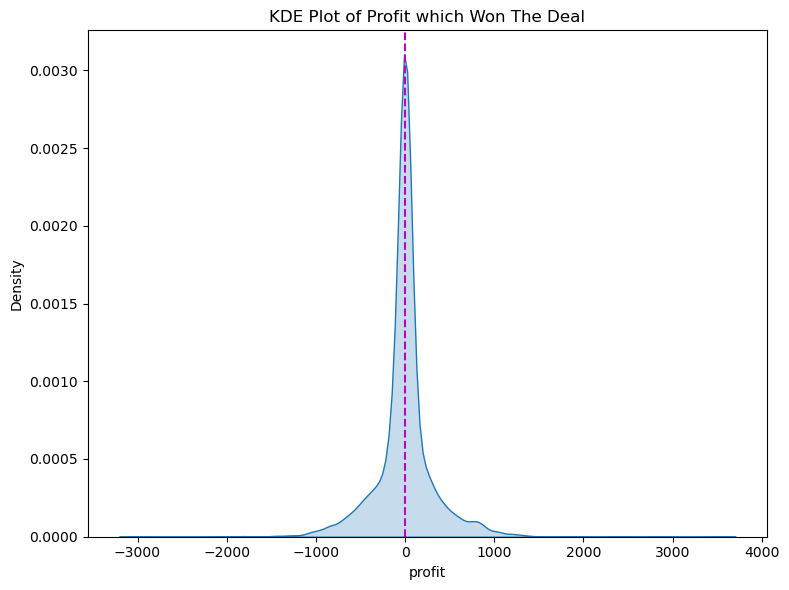

In [48]:
# kde plot of profit which won the deal
plt.figure(figsize = (8,6))
ax = sns.kdeplot(data = won_deal,x = 'profit', fill = True)
ylim = ax.get_ylim()
ax.plot([won_deal['profit'].mean(),won_deal['profit'].mean()], ax.get_ylim(), linestyle = '--', color = 'm')
ax.set_ylim(ylim)
plt.title('KDE Plot of Profit which Won The Deal')
plt.tight_layout()
plt.show()

Terlihat bahwa distribusi profit cenderung normal. Namun jika diperhatikan terdapat sebaran nilai negatif yang besar. Hal ini menunjukan jika kerugian perusahaan cukup besar.

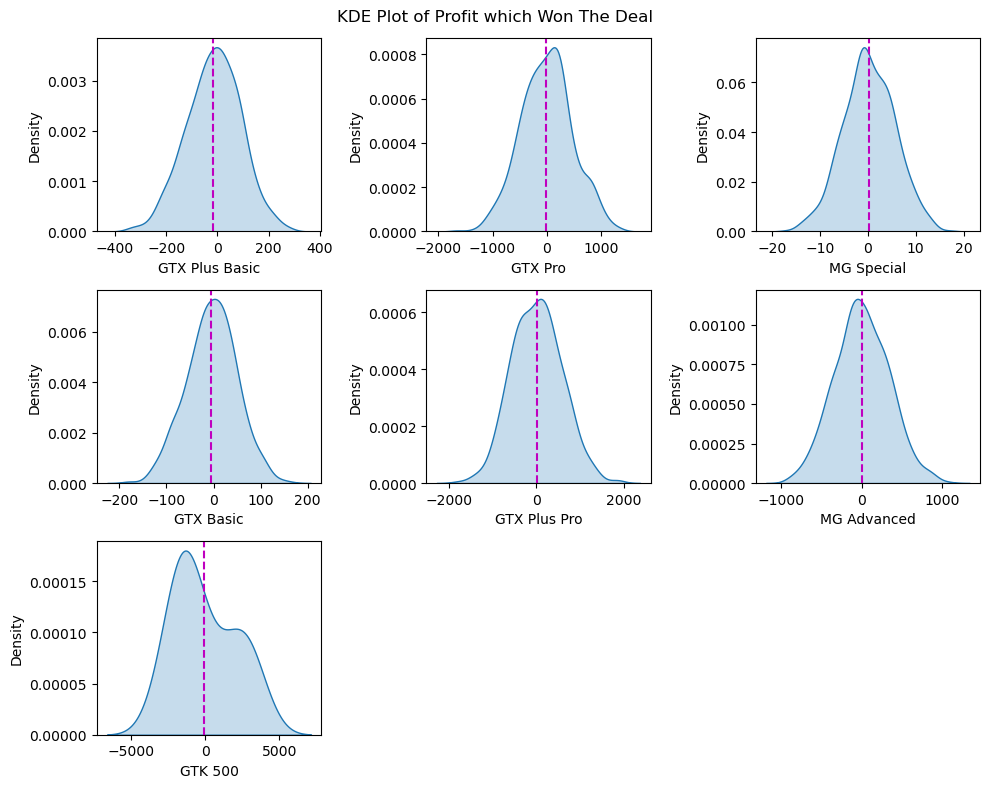

In [49]:
# kde plot of profit which won the deal based on products
fig, axes = plt.subplots(ncols = 3, nrows = 3, figsize = (10,8), layout = 'constrained')
for product, ax in zip(won_deal['product'].unique(), axes.flat):
    plots = sns.kdeplot(ax = ax, data = won_deal[won_deal['product']==product],x = 'profit', fill = True)
    ylim = plots.get_ylim()
    plots.plot([won_deal[won_deal['product']==product]['profit'].mean(),won_deal[won_deal['product']==product]['profit'].mean()], plots.get_ylim(), linestyle = '--', color = 'm')
    plots.set_ylim(ylim)
    plots.set_xlabel(product)
fig.delaxes(axes[2,1])
fig.delaxes(axes[2,2])
plt.suptitle('KDE Plot of Profit which Won The Deal')
plt.tight_layout()
plt.show()

Jika di break down berdasarkan produk, meskipun seluruh produk memiliki distribusi yang cenderung normal.

In [50]:
# trend revenue tiap bulan
monthly_revenue = sales_pipeline2[sales_pipeline2['deal_stage'] == 'Won'][['close_date','close_value']].reset_index(drop=True)
monthly_revenue = monthly_revenue.groupby(by = monthly_revenue['close_date'].dt.month).agg(total_value = ('close_value','sum')).reset_index()
monthly_revenue['month'] = monthly_revenue['close_date'].apply(lambda x:calendar.month_name[x])

In [51]:
monthly_revenue.sort_values(by = 'total_value',ascending = False)

,close_date,total_value,month
3,6,1338466.0,June
6,9,1235264.0,September
0,3,1134672.0,March
9,12,1131573.0,December
5,8,1050059.0,August
2,5,1025713.0,May
8,11,938943.0,November
7,10,731980.0,October
1,4,721932.0,April
4,7,696932.0,July


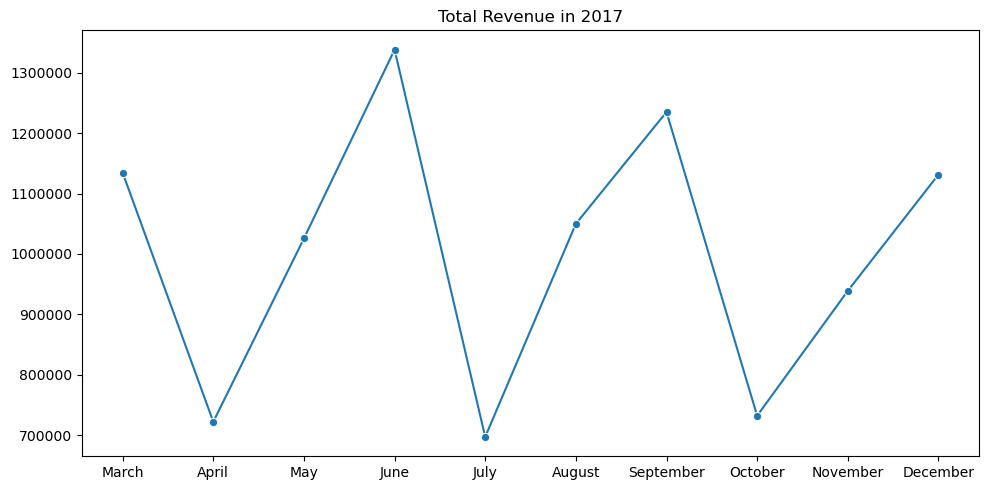

In [52]:
plt.figure(figsize = (10,5))
ax = sns.lineplot(data = monthly_revenue, x = 'month',y = 'total_value', marker = 'o')
ax.set_xlabel(None)
ax.set_ylabel(None)
plt.title('Total Revenue in 2017')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

Revenue terbesar selama setahun terjadi pada bulan Juni sebesar 1,338,466 USD. Sementara yang terendah terjadi pada bulan April (721,932 USD), Juli (696,932 USD), dan Oktober (731,980 USD).

Terlihat sebaran revenue yang dihasilkan di tahun 2017 memiliki pola yang fluktuatif. Namun jika diperhatikan, terdapat pola yang menarik. Terjadi penurunan revenue di setiap awal bulan per triwulan dan akan terus meningkat hingga bulan terakhir per triwulan.

In [53]:
# trend profit tiap bulan
monthly_profit = sales_pipeline2[sales_pipeline2['deal_stage'] == 'Won'][['close_date','profit']].reset_index(drop=True)
monthly_profit = monthly_profit.groupby(by = monthly_profit['close_date'].dt.month).agg(total_profit = ('profit','sum')).reset_index()
monthly_profit['month'] = monthly_profit['close_date'].apply(lambda x:calendar.month_name[x])

In [54]:
monthly_profit.sort_values(by = 'total_profit',ascending = False)

,close_date,total_profit,month
3,6,4782.0,June
8,11,2233.0,November
6,9,1606.0,September
7,10,1181.0,October
9,12,535.0,December
1,4,-112.0,April
2,5,-3951.0,May
4,7,-7354.0,July
0,3,-7427.0,March
5,8,-9441.0,August


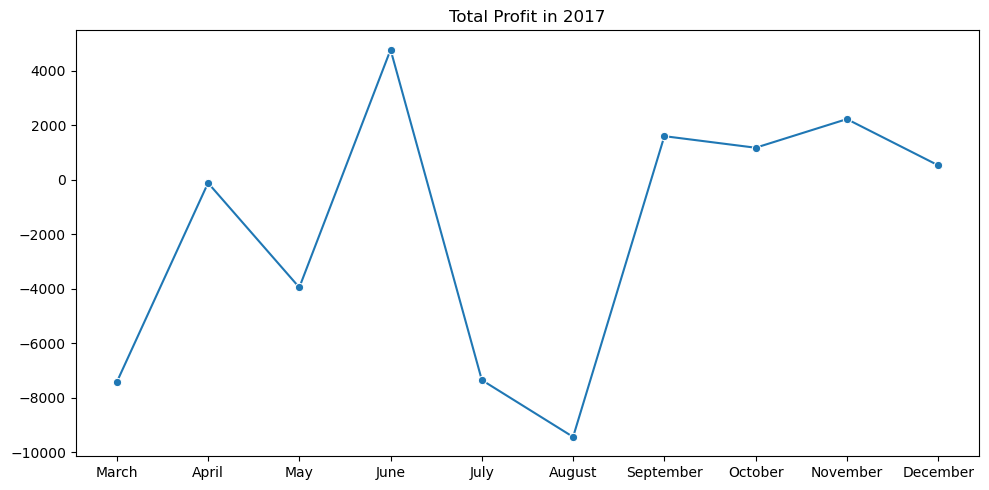

In [55]:
plt.figure(figsize = (10,5))
ax = sns.lineplot(data = monthly_profit, x = 'month',y = 'total_profit', marker = 'o')
ax.set_xlabel(None)
ax.set_ylabel(None)
plt.title('Total Profit in 2017')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

Profit terbesar selama setahun terjadi pada bulan Juni sebesar 4782.0 USD. Sementara yang terendah terjadi pada bulan Agustus sebesar -9441.0 USD.

Terlihat bahwa Semester pertama di tahun 2017 cenderung mengalami kerugian di Semester kedua menjelang akhir tahun cenderung mengalami profit.

In [56]:
# Revenue berdasarkan produk yang dijual
revenue_product = sales_pipeline2[sales_pipeline2['deal_stage']=='Won'].reset_index(drop=True)
revenue_product = revenue_product[['product','close_value']]
revenue_product = revenue_product.groupby(by = 'product', as_index = False).agg(total_value = ('close_value','sum'))
revenue_product['total_value'] = revenue_product['total_value']/1000000
revenue_product = revenue_product.sort_values(by = 'total_value', ascending = False, ignore_index = True)

In [57]:
revenue_product

,product,total_value
0,GTX Pro,3.510578
1,GTX Plus Pro,2.629651
2,MG Advanced,2.216387
3,GTX Plus Basic,0.705275
4,GTX Basic,0.499263
5,GTK 500,0.400612
6,MG Special,0.043768


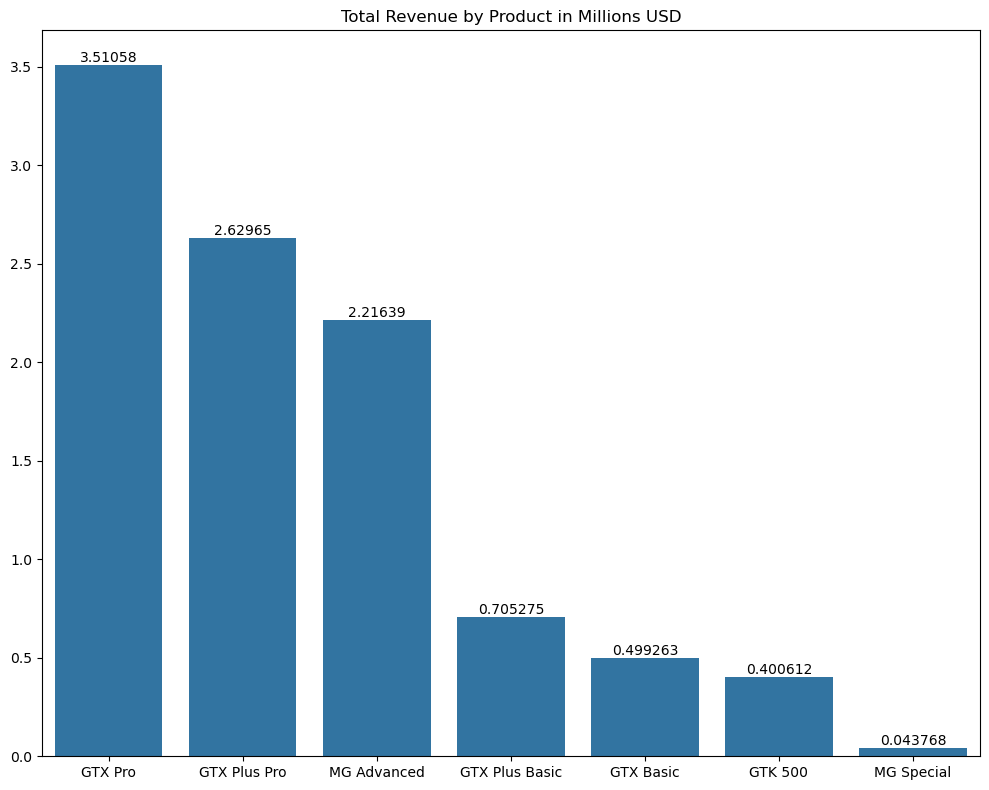

In [58]:
plt.figure(figsize = (10,8))
ax = sns.barplot(data = revenue_product, x = 'product', y = 'total_value')
ax.bar_label(ax.containers[0])
ax.set_xlabel(None)
ax.set_ylabel(None)
plt.title('Total Revenue by Product in Millions USD')
#plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

Terdapat 3 produk yang menghasilkan revenue di atas 1 juta USD antara lain GTXPro (3.5 juta USD), GTX Plus Pro (2.6 juta USD), dan MG Advanced (2.2 juta USD). Sementara produk yang menghasilkan revenu paling rendah adalah MG Special (43 ribu USD). Hal ini menunjukan jika GTX Pro menjadi produk yang paling diminati sementara MG Special kurang dimintai.

In [59]:
# Profit berdasarkan produk yang dijual
profit_product = sales_pipeline2[sales_pipeline2['deal_stage']=='Won'].reset_index(drop=True)
profit_product = profit_product[['product','profit']]
profit_product = profit_product.groupby(by = 'product', as_index = False).agg(total_profit = ('profit','sum'))
#profit_product['total_profit'] = profit_product['total_value']/1000000
profit_product = profit_product.sort_values(by = 'total_profit', ascending = False, ignore_index = True)

In [60]:
profit_product

,product,total_profit
0,GTX Plus Pro,3773.0
1,MG Special,153.0
2,GTK 500,-908.0
3,MG Advanced,-2635.0
4,GTX Pro,-3931.0
5,GTX Basic,-3987.0
6,GTX Plus Basic,-10413.0


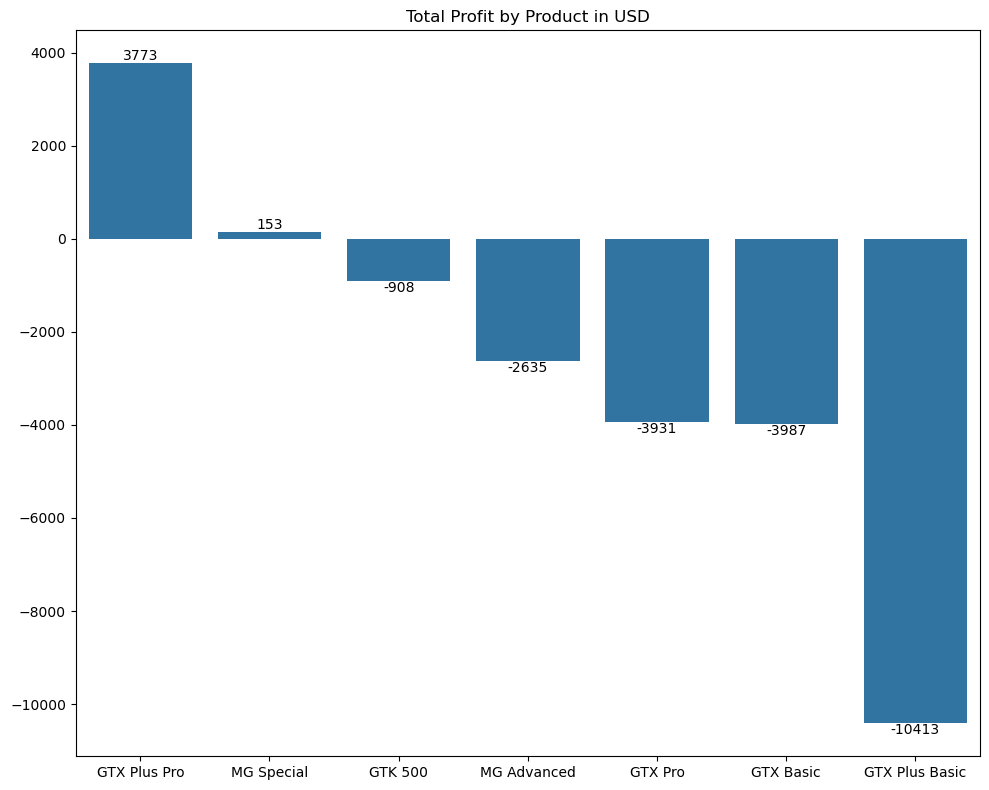

In [61]:
plt.figure(figsize = (10,8))
ax = sns.barplot(data = profit_product, x = 'product', y = 'total_profit')
ax.bar_label(ax.containers[0])
ax.set_xlabel(None)
ax.set_ylabel(None)
plt.title('Total Profit by Product in USD')
#plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

Terdapat 2 produk dengan profit positif yaitu GTX Plus Pro (3,773 USD) dan MG Special (153 USD). Sementara produk lain menghasilkan profit negatif. Bahkan GTX Plus Basic menjadi produk dengan profit negatif paling besar (10,413 USD).

In [62]:
# top 10 company yang menghasilkan revenue terbesar
account_revenue = sales_pipeline2[sales_pipeline2['deal_stage']=='Won']
account_revenue = account_revenue[['account','close_value']]
account_revenue = account_revenue.groupby(by = 'account', as_index = False).agg(total_revenue = ('close_value','sum'))
account_revenue['total_revenue'] = account_revenue['total_revenue']/1000000
account_revenue = account_revenue.sort_values(by = 'total_revenue',ascending = False)
account_revenue = account_revenue.reset_index(drop = True)

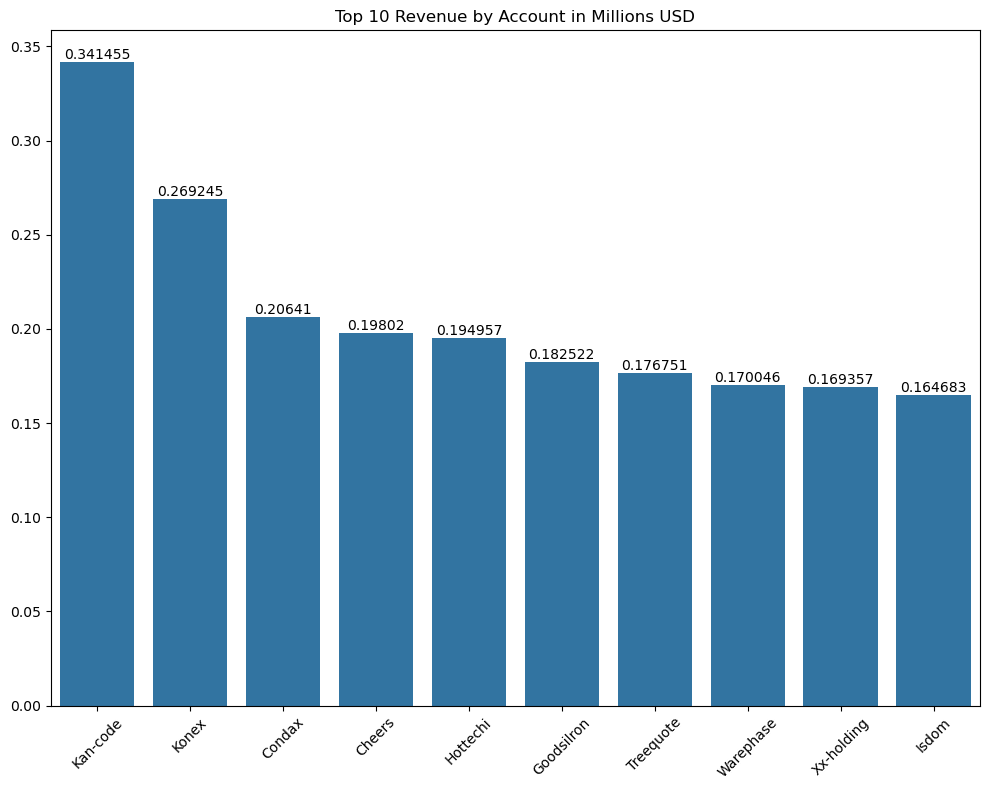

In [63]:
plt.figure(figsize = (10,8))
ax = sns.barplot(data = account_revenue.head(10), x = 'account', y = 'total_revenue')
ax.bar_label(ax.containers[0])
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.tick_params(axis = 'x', rotation = 45)
plt.title('Top 10 Revenue by Account in Millions USD')
#plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

Total revenue yang dihasilkan dari tiap perusahaan tidak lebih dari jutaan. Perusahaan yang menghasilkan revenue paling besar adalah Kan-code (341 ribu USD). Sementara yang paling rendah dari top 10 adalah Isdom (165 ribu USD).

In [64]:
acc_top_10 = account_revenue.head(10)['account'].tolist()
accounts[accounts['account'].isin(acc_top_10)].sort_values('year_established')

,account,sector,year_established,revenue,employees,office_location,subsidiary_of
43,Konex,technolgy,1980,7708.38,13756,United States,NaN
41,Kan-code,software,1982,11698.03,34288,United States,NaN
72,Treequote,telecommunications,1988,5266.09,8595,United States,Sonron
9,Cheers,entertainment,1993,4269.90,6472,United States,Massive Dynamic
76,Xx-holding,finance,1993,7537.24,20293,United States,NaN
35,Hottechi,technolgy,1997,8170.38,16499,Korea,NaN
75,Warephase,services,1997,2041.73,5276,United States,NaN
31,Goodsilron,marketing,2000,2952.73,5107,United States,NaN
38,Isdom,medical,2002,3178.24,4540,United States,NaN
11,Condax,medical,2017,4.54,9,United States,NaN


* Kan-code sebagai perusahaan yang menghasilkan revenue paling besar merupakan salah satu perusahaan besar yang tercatat dalam database pelanggan perusahaan yang memiliki penghasilan mencapai 12 miliar dalam setahun.
* Informasi lain yang diperoleh adalah top 10 perusahaan yang menghasilkan revenue paling besar mayoritas berasal dari United States.
* Menariknya dari 10 perusahaan ini, Condax merupakan perusahaan yang baru berdiri di tahun 2017.

In [65]:
# top 10 company yang menghasilkan profit terbesar
account_profit = sales_pipeline2[sales_pipeline2['deal_stage']=='Won']
account_profit = account_profit[['account','profit']]
account_profit = account_profit.groupby(by = 'account', as_index = False).agg(total_profit = ('profit','sum'))
#account_profit['total_profit'] = account_revenue['total_profit']/1000000
account_profit = account_profit.sort_values(by = 'total_profit',ascending = False)
account_profit = account_profit.reset_index(drop = True)

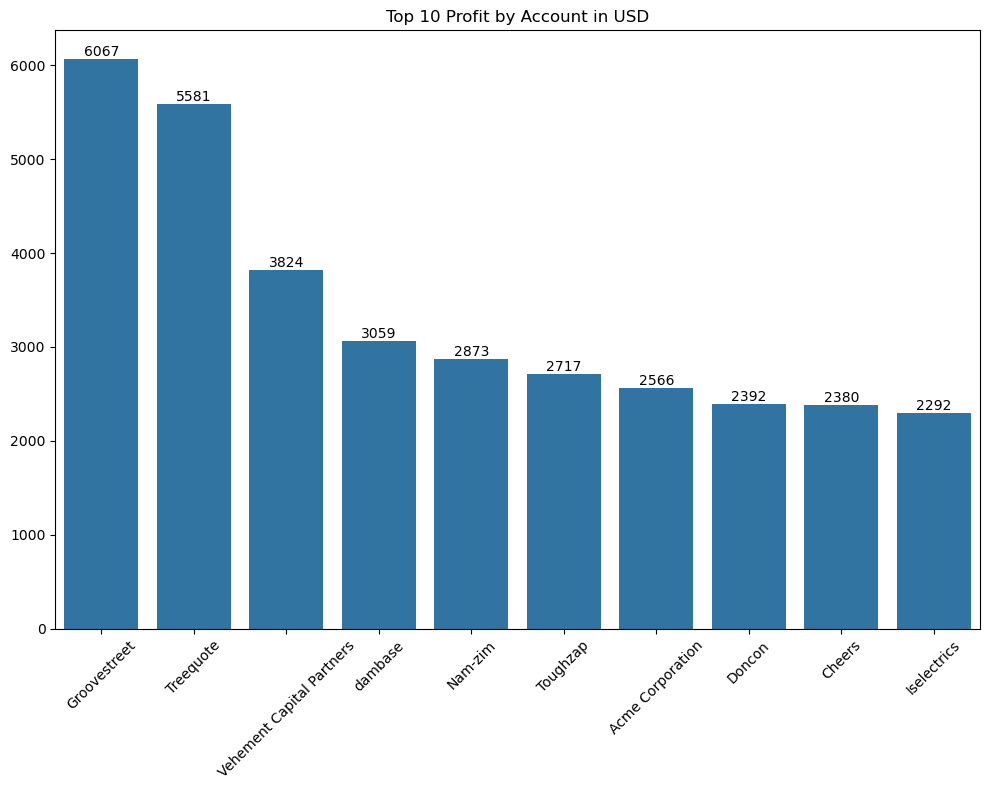

In [66]:
plt.figure(figsize = (10,8))
ax = sns.barplot(data = account_profit.head(10), x = 'account', y = 'total_profit')
ax.bar_label(ax.containers[0])
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.tick_params(axis = 'x', rotation = 45)
plt.title('Top 10 Profit by Account in USD')
#plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

Total profit terbesar dihasilkan oleh perusahaan Groovestreet (6067 USD). Sementara yang paling rendah dari top 10 adalah Isdom (165 ribu USD).

In [67]:
acc_top_10 = account_profit.head(10)['account'].tolist()
accounts[accounts['account'].isin(acc_top_10)].sort_values('year_established')

,account,sector,year_established,revenue,employees,office_location,subsidiary_of
49,Nam-zim,services,1987,405.59,1179,Brazil,Warephase
72,Treequote,telecommunications,1988,5266.09,8595,United States,Sonron
9,Cheers,entertainment,1993,4269.90,6472,United States,Massive Dynamic
74,Vehement Capital Partners,finance,1993,646.10,883,United States,Golddex
14,dambase,marketing,1995,2173.98,2928,United States,Inity
71,Toughzap,retail,1995,332.43,799,United States,NaN
0,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN
33,Groovestreet,retail,2003,223.80,299,United States,NaN
16,Doncon,technolgy,2010,587.72,1501,United States,NaN
39,Iselectrics,technolgy,2011,527.11,1428,United States,Acme Corporation


Diperoleh informasi bahwa top 10 perusahaan yang menghasilkan profit paling besar mayoritas berasal dari United States.

In [68]:
# Sales berdasarkan lokasi pembeli
sales_by_loc = sales_pipeline2[sales_pipeline2['deal_stage']=='Won'].reset_index(drop=True)
sales_by_loc = sales_by_loc.merge(accounts[['account','office_location']], on = 'account', how = 'left')
sales_by_loc = sales_by_loc[['office_location','close_value']]
sales_by_loc = sales_by_loc.groupby(by = 'office_location', as_index = False).agg(total_sales = ('close_value','sum'))
sales_by_loc['total_sales'] = round(sales_by_loc['total_sales']/1000000,2)
sales_by_loc = sales_by_loc.sort_values(by = 'total_sales', ascending = False, ignore_index = True)

In [69]:
sales_by_loc

,office_location,total_sales
0,United States,8.43
1,Korea,0.19
2,Jordan,0.16
3,Panama,0.15
4,Belgium,0.12
5,Japan,0.12
6,Norway,0.12
7,Italy,0.11
8,Kenya,0.11
9,Poland,0.11


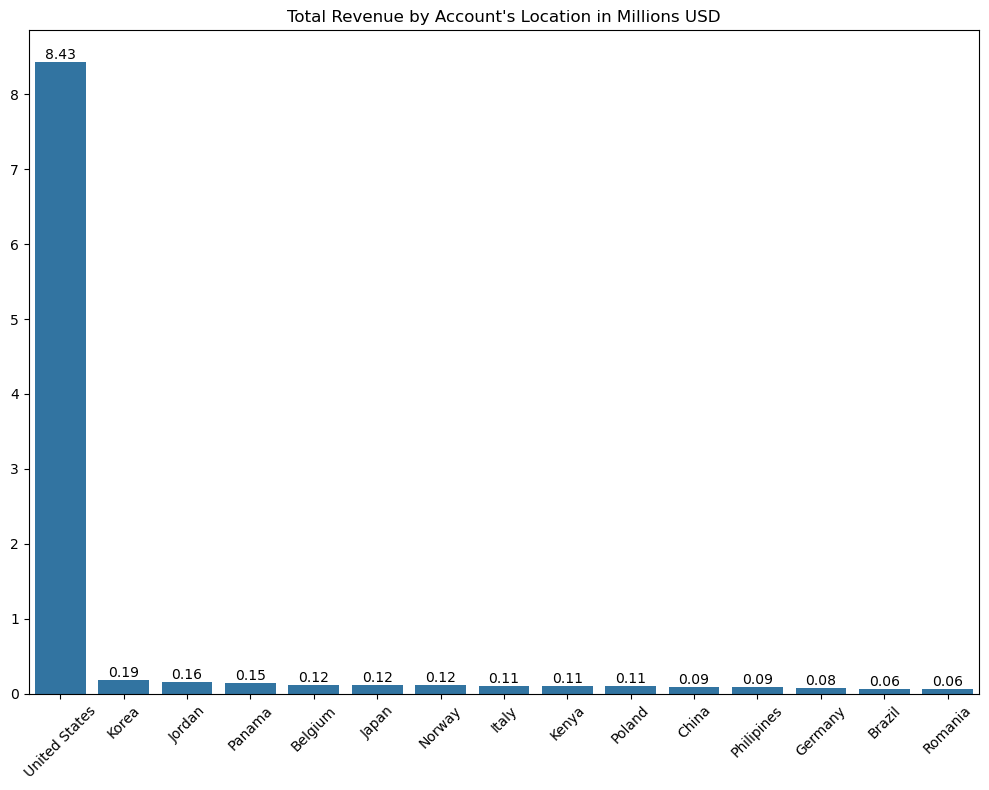

In [70]:
# Total Sales by Account's Location
plt.figure(figsize = (10,8))
ax = sns.barplot(data = sales_by_loc, x = 'office_location', y = 'total_sales')
ax.bar_label(ax.containers[0])
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.tick_params(axis = 'x', rotation = 45)
plt.title("Total Revenue by Account's Location in Millions USD")
plt.tight_layout()
plt.show()

Penjualan produk terbesar dihasilkan oleh perusahaan asal United States (8.43 juta USD). Sementara penjualan produk yang dihasilkan oleh wilayah lain berada di angka 100 ribu-an hingga ke bawah.

In [71]:
# Profit berdasarkan lokasi pembeli
profit_by_loc = sales_pipeline2[sales_pipeline2['deal_stage']=='Won'].reset_index(drop=True)
profit_by_loc = profit_by_loc.merge(accounts[['account','office_location']], on = 'account', how = 'left')
profit_by_loc = profit_by_loc[['office_location','profit']]
profit_by_loc = profit_by_loc.groupby(by = 'office_location', as_index = False).agg(total_profit = ('profit','sum'))
#profit_by_loc['total_profit'] = round(profit_by_loc['total_profit']/1000000,2)
profit_by_loc = profit_by_loc.sort_values(by = 'total_profit', ascending = False, ignore_index = True)

In [72]:
profit_by_loc

,office_location,total_profit
0,Brazil,2873.0
1,China,1253.0
2,Philipines,884.0
3,Panama,357.0
4,Kenya,-982.0
5,Korea,-1067.0
6,Germany,-1262.0
7,Japan,-1330.0
8,United States,-1351.0
9,Romania,-1683.0


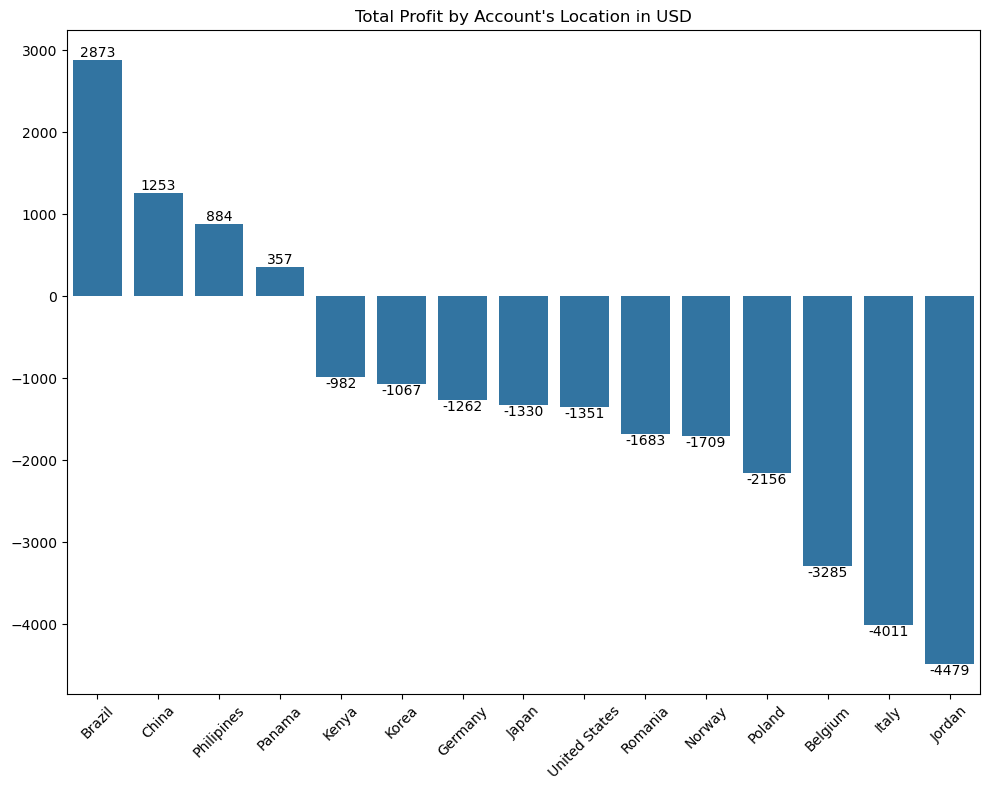

In [73]:
# Total Profit by Account's Location
plt.figure(figsize = (10,8))
ax = sns.barplot(data = profit_by_loc, x = 'office_location', y = 'total_profit')
ax.bar_label(ax.containers[0])
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.tick_params(axis = 'x', rotation = 45)
plt.title("Total Profit by Account's Location in USD")
plt.tight_layout()
plt.show()

Hanya 4 wilayah asal perusahaan yang menghasilkan profit positif yaitu Brazil (2873 USD), China (1253 USD), Philipines (884 USD), dan Panama (357 USD). Sementara yang lain menghasilkan profit negatif, khususnya Jordan (4479 USD).

In [74]:
# Sales berdasarkan sektor perusahaan pembeli
sales_by_sec = sales_pipeline2[sales_pipeline2['deal_stage']=='Won'].reset_index(drop=True)
sales_by_sec = sales_by_sec.merge(accounts[['account','sector']], on = 'account', how = 'left')
sales_by_sec = sales_by_sec[['sector','close_value']]
sales_by_sec = sales_by_sec.groupby(by = 'sector', as_index = False).agg(total_sales = ('close_value','sum'))
sales_by_sec['total_sales'] = round(sales_by_sec['total_sales']/1000000,2)
sales_by_sec = sales_by_sec.sort_values(by = 'total_sales', ascending = False, ignore_index = True)

In [75]:
sales_by_sec

,sector,total_sales
0,retail,1.87
1,technolgy,1.52
2,medical,1.36
3,software,1.08
4,finance,0.95
5,marketing,0.92
6,entertainment,0.69
7,telecommunications,0.65
8,services,0.53
9,employment,0.44


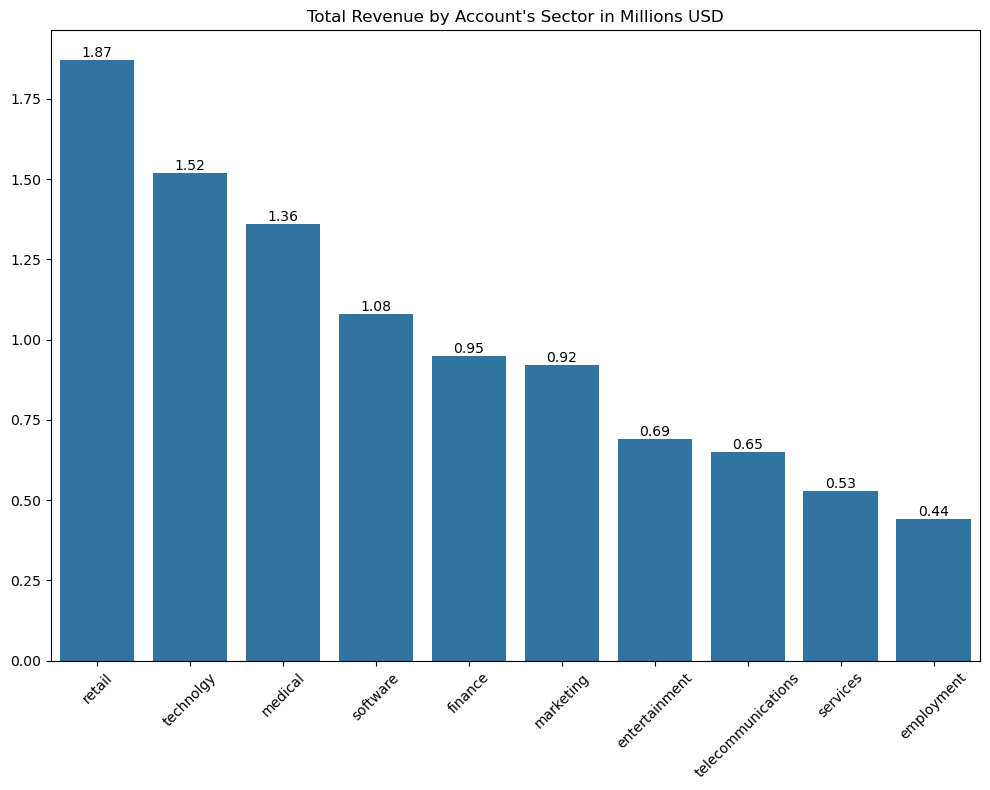

In [76]:
# Total Sales by Account's Sector
plt.figure(figsize = (10,8))
ax = sns.barplot(data = sales_by_sec, x = 'sector', y = 'total_sales')
ax.bar_label(ax.containers[0])
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.tick_params(axis = 'x', rotation = 45)
plt.title("Total Revenue by Account's Sector in Millions USD")
plt.tight_layout()
plt.show()

Penjualan produk terbesar dihasilkan oleh perusahaan pada sektor retail (1.87 juta USD). Sementara sektor lain dengan penjualan produk di atas 1 juta adalah teknologi, medis, dan software. Untuk penjualan terendah adalah pada sektor kepegawaian (440 ribu USD).

In [77]:
# Revenue berdasarkan sales agent
revenue_sales_agent = sales_pipeline2[sales_pipeline2['deal_stage']=='Won'].reset_index(drop=True)
revenue_sales_agent = revenue_sales_agent[['sales_agent','close_value']]
revenue_sales_agent = revenue_sales_agent.groupby(by = 'sales_agent', as_index = False).agg(total_value = ('close_value','sum'))
revenue_sales_agent['total_value'] = revenue_sales_agent['total_value']/1000000
revenue_sales_agent = revenue_sales_agent.sort_values(by = 'total_value', ascending = False, ignore_index = True)
revenue_sales_agent['total_value_rounded'] = round(revenue_sales_agent['total_value'],1)

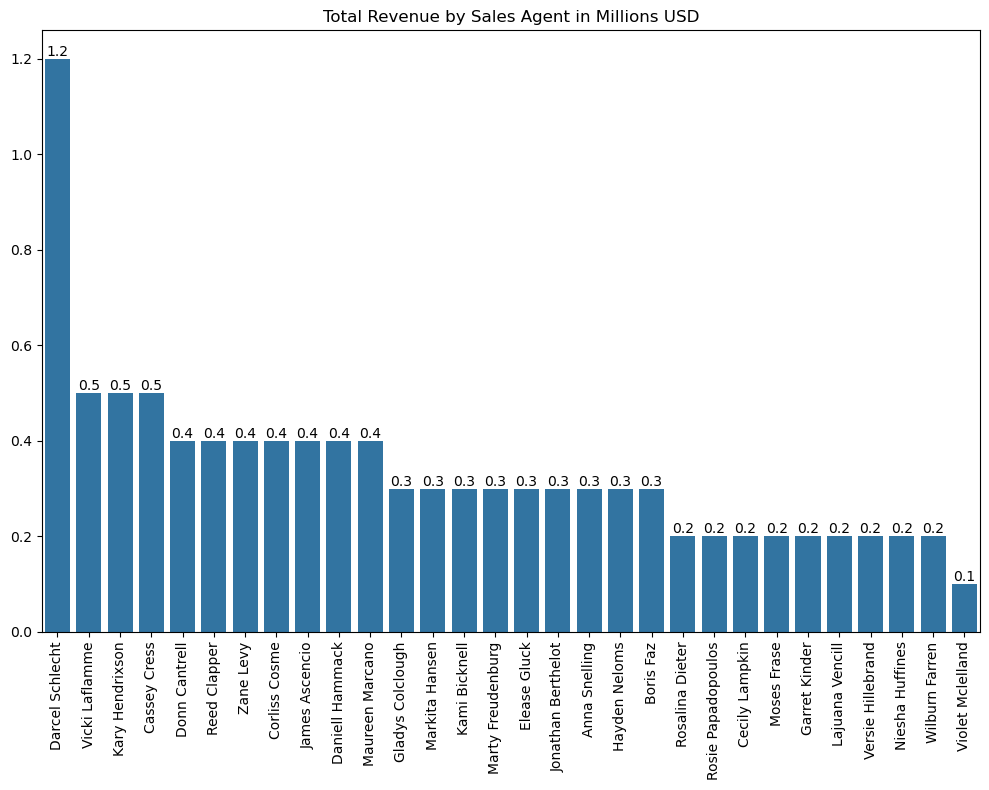

In [78]:
plt.figure(figsize = (10,8))
ax = sns.barplot(data = revenue_sales_agent, x = 'sales_agent', y = 'total_value_rounded')
ax.bar_label(ax.containers[0])
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.tick_params(axis = 'x',rotation = 90)
plt.title('Total Revenue by Sales Agent in Millions USD')
#plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

Revenue paling besar dihasilkan oleh Darcel Schlecht sebesar 1.2 juta USD. Sementara yang paling rendah adalah Violet Mclelland sebesar 100 ribu USD. Menariknya hanya Darcel Schlecht yang berhasil berkontribusi lebih hingga mendapatkan revenue di angka jutaan.

In [79]:
# profit berdasarkan sales agent
profit_sales_agent = sales_pipeline2[sales_pipeline2['deal_stage']=='Won'].reset_index(drop=True)
profit_sales_agent = profit_sales_agent[['sales_agent','profit']]
profit_sales_agent = profit_sales_agent.groupby(by = 'sales_agent', as_index = False).agg(total_profit = ('profit','sum'))
profit_sales_agent['total_profit'] = round(profit_sales_agent['total_profit']/1000,2)
profit_sales_agent = profit_sales_agent.sort_values(by = 'total_profit', ascending = False, ignore_index = True)

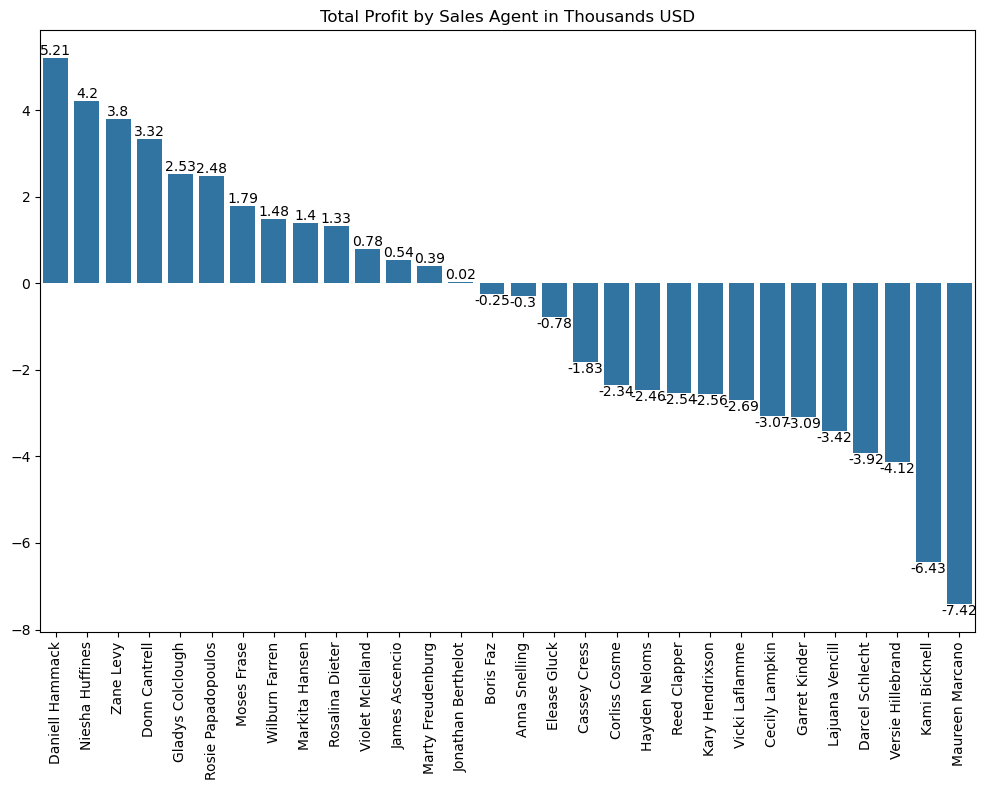

In [80]:
plt.figure(figsize = (10,8))
ax = sns.barplot(data = profit_sales_agent, x = 'sales_agent', y = 'total_profit')
ax.bar_label(ax.containers[0])
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.tick_params(axis = 'x',rotation = 90)
plt.title('Total Profit by Sales Agent in Thousands USD')
#plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

In [81]:
saler = sales_pipeline2[['opportunity_id','sales_agent','close_value','profit']]
saler_info = sales_teams[['sales_agent','manager','regional_office']]
saler = saler.merge(saler_info, how = 'left', on = 'sales_agent')

In [82]:
saler.head()

,opportunity_id,sales_agent,close_value,profit,manager,regional_office
0,1C1I7A6R,Moses Frase,1054.0,-42.0,Dustin Brinkmann,Central
1,Z063OYW0,Darcel Schlecht,4514.0,-307.0,Melvin Marxen,Central
2,EC4QE1BX,Darcel Schlecht,50.0,-5.0,Melvin Marxen,Central
3,MV1LWRNH,Moses Frase,588.0,38.0,Dustin Brinkmann,Central
4,PE84CX4O,Zane Levy,517.0,-33.0,Summer Sewald,West


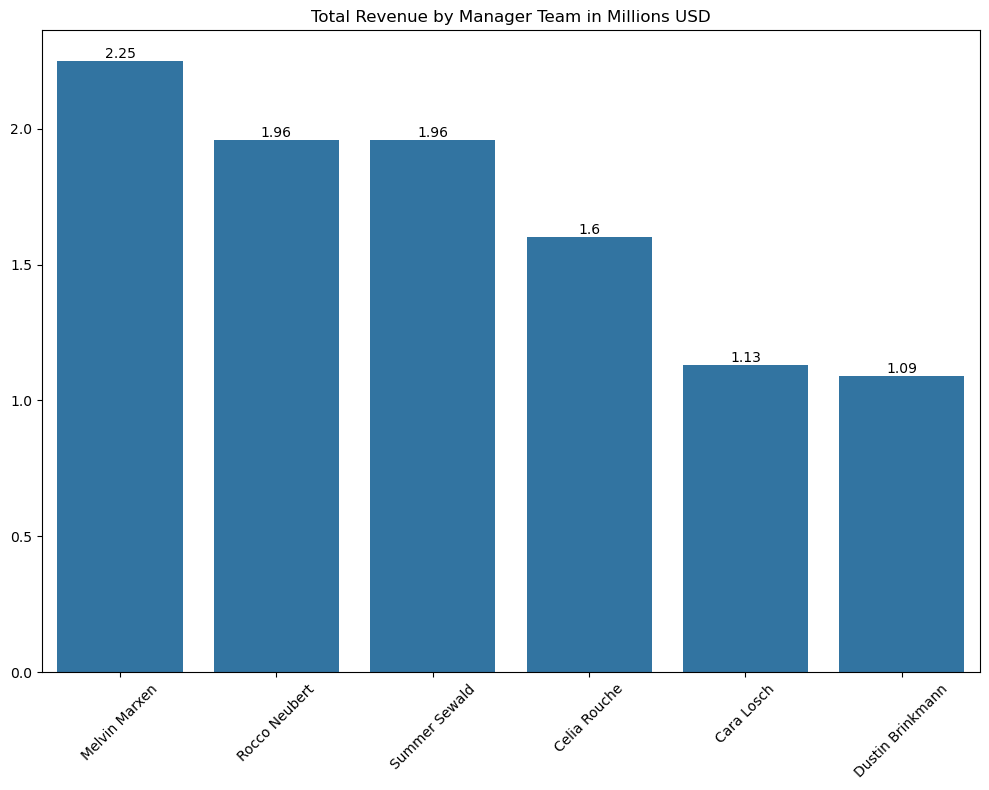

In [83]:
# Total Sales by Manager Teams
sales_by_managaer = saler[['manager','close_value']].groupby(by = 'manager', as_index = False).agg(total_sales = ('close_value','sum'))
sales_by_managaer['total_sales'] = round(sales_by_managaer['total_sales']/1000000,2)


plt.figure(figsize = (10,8))
ax = sns.barplot(data = sales_by_managaer.sort_values(by = 'total_sales', ascending = False), x = 'manager', y = 'total_sales')
ax.bar_label(ax.containers[0])
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.tick_params(axis = 'x', rotation = 45)
plt.title("Total Revenue by Manager Team in Millions USD")
plt.tight_layout()
plt.show()

Penjualan produk terbesar berasal dari tim manager Melvin Marxen (2.25 juta USD). Sementara yang paling sedikit adalah tim manager Dustin Brinkmann (1.09 juta USD).

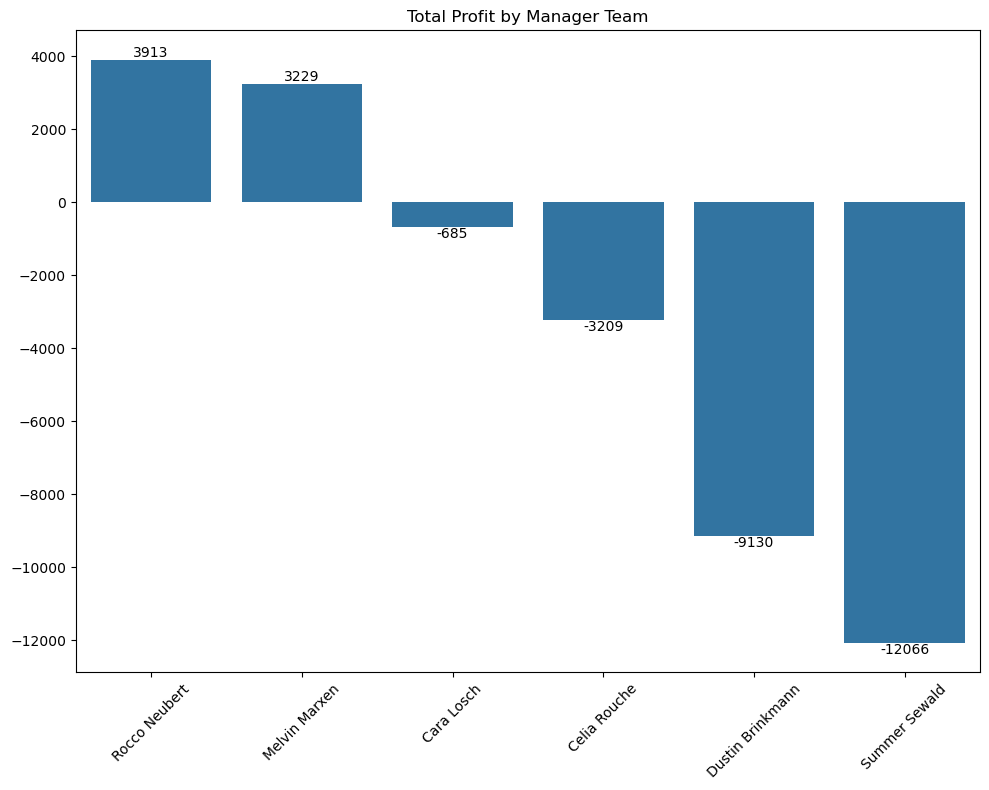

In [84]:
# Total Profit by Manager Teams
profit_by_manager = saler[['manager','profit']].groupby(by = 'manager', as_index = False).agg(total_profit = ('profit','sum'))
#sales_by_managaer['total_profit'] = round(sales_by_managaer['total_profit']/1000000,2)


plt.figure(figsize = (10,8))
ax = sns.barplot(data = profit_by_manager.sort_values(by = 'total_profit', ascending = False), x = 'manager', y = 'total_profit')
ax.bar_label(ax.containers[0])
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.tick_params(axis = 'x', rotation = 45)
plt.title("Total Profit by Manager Team")
plt.tight_layout()
plt.show()

Hanya 2 tim manager yang menghasilkan profit positif yaitu Rocco Neubert (3913 USD) dan Melvin Marxen (3229 USD). Lainnya menghasilkan profit negatif.

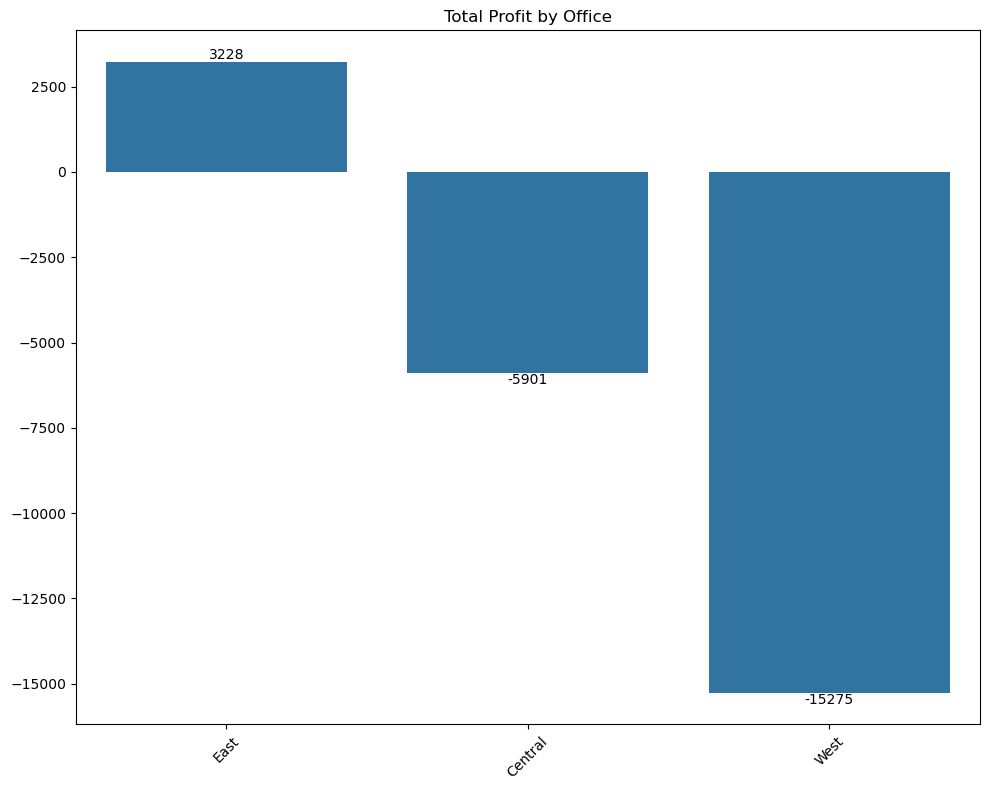

In [85]:
# Total Profit by Office
profit_by_regional_office = saler[['regional_office','profit']].groupby(by = 'regional_office', as_index = False).agg(total_profit = ('profit','sum'))
#sales_by_managaer['total_profit'] = round(sales_by_managaer['total_profit']/1000000,2)


plt.figure(figsize = (10,8))
ax = sns.barplot(data = profit_by_regional_office.sort_values(by = 'total_profit', ascending = False), x = 'regional_office', y = 'total_profit')
ax.bar_label(ax.containers[0])
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.tick_params(axis = 'x', rotation = 45)
plt.title("Total Profit by Office")
plt.tight_layout()
plt.show()

Terlihat hanya kantor pemasaran yang berada di East yang menghasilkan profit positif (3228 USD). Lainnya menghasilkan profit negatif.

In [86]:
deal_date = sales_pipeline2.loc[:,['deal_stage','engage_date','close_date']]
deal_date = deal_date[deal_date['deal_stage']=='Won'].reset_index(drop = True)
deal_date['deal_day'] = (deal_date['close_date'] - deal_date['engage_date']).dt.days

In [87]:
max_deal = deal_date['deal_day'].max()
min_deal = deal_date['deal_day'].min()
mean_deal = deal_date['deal_day'].mean()

print(f'Rata-rata lamanya kesepakatan penjualan adalah {round(mean_deal,0)} hari')
print(f'Kesepakatan penjualan terlama adalah {max_deal} hari')
print(f'Kesepakatan penjualan tercepat adalah {min_deal} hari')

Rata-rata lamanya kesepakatan penjualan adalah 52.0 hari
Kesepakatan penjualan terlama adalah 138 hari
Kesepakatan penjualan tercepat adalah 1 hari


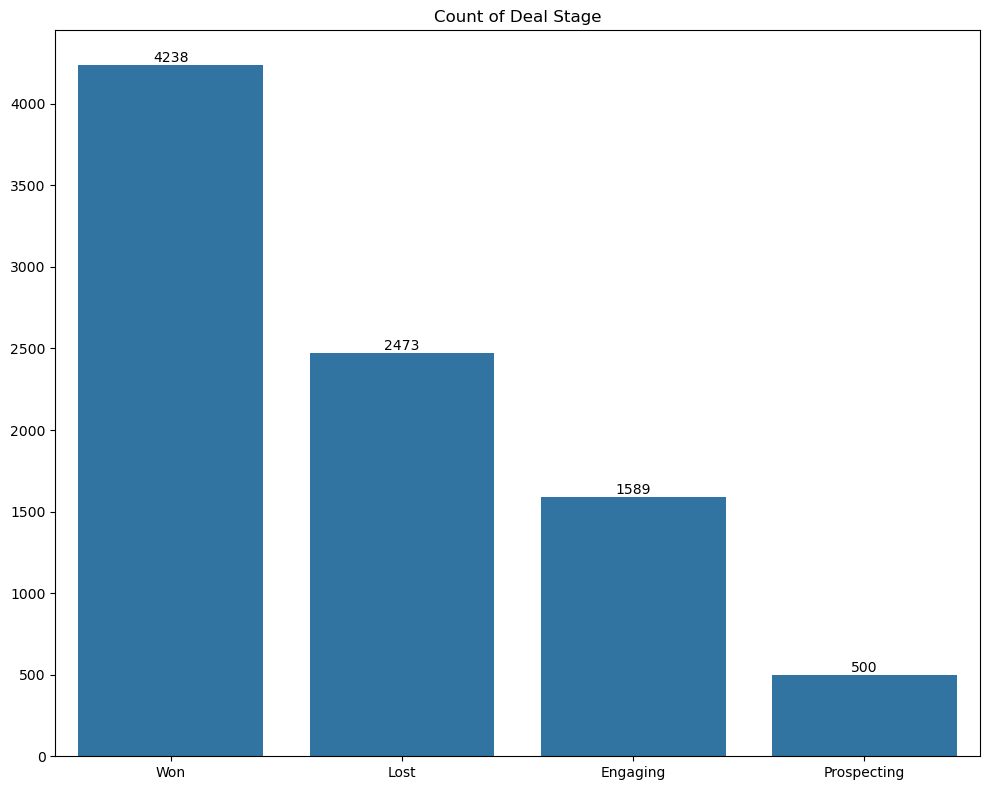

In [88]:
# Distribution of sales deal
plt.figure(figsize = (10,8))
ax = sns.barplot(sales_pipeline['deal_stage'].value_counts())
ax.bar_label(ax.containers[0])
ax.set_xlabel(None)
ax.set_ylabel(None)
#ax.tick_params(axis = 'x', rotation = 45)
plt.title('Count of Deal Stage')
plt.tight_layout()
plt.show()

Sejak 20 Oktober 2016 hingga 27 Desember 2017, diperoleh informasi penjualan:
* Sebanyak 4238 penjualan berhasil dilakukan
* Sebanyak 2473 penjualan gagal dilakukan
* Sebanyak 1589 masih dalam proses kesepakatan dengan pembeli
* Sebanyak 500 masih dalam proses pencarian pembeli baru

## Bivariate Analysis

In [89]:
deal = sales_pipeline2[['deal_stage','product','deal_day','close_value','profit']]
deal = deal[deal['deal_stage'].isin(['Won','Lost'])].reset_index(drop=True)

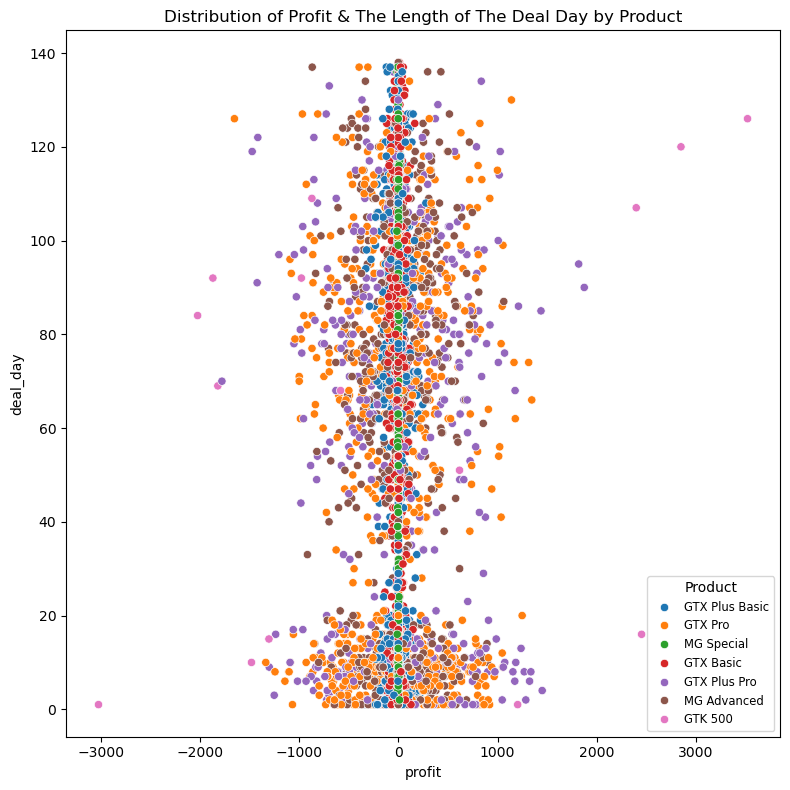

In [90]:
plt.figure(figsize = (8,8))
sns.scatterplot(deal, x = 'profit',y = 'deal_day', hue = 'product')
plt.title('Distribution of Profit & The Length of The Deal Day by Product')
plt.legend(title = 'Product', loc = 4, fontsize = 'small')
plt.tight_layout()
plt.show()

Diperoleh informasi:
* Produk GTX Plus Basic dan GTX Basic tersebar di sekitaran profit = 0. Hal ini menunjukan jika kedua produk tersebut memiliki potensi `Lost` lebih besar dibandingkan produk lain dan lamanya hari kesepakatan juga tidak terlalu berpengaruh.
* Pada lamanya hari kesepakatan di interval 20 - 40 hari, terlihat bahwa sebaran data cenderung disekitar 0. Hal ini menandakan jika di interval tersebut cenderung mengalami `Lost`.
* Sebaran data terbanyak berada di range 0 - 20 hari lamanya kesepakatan.

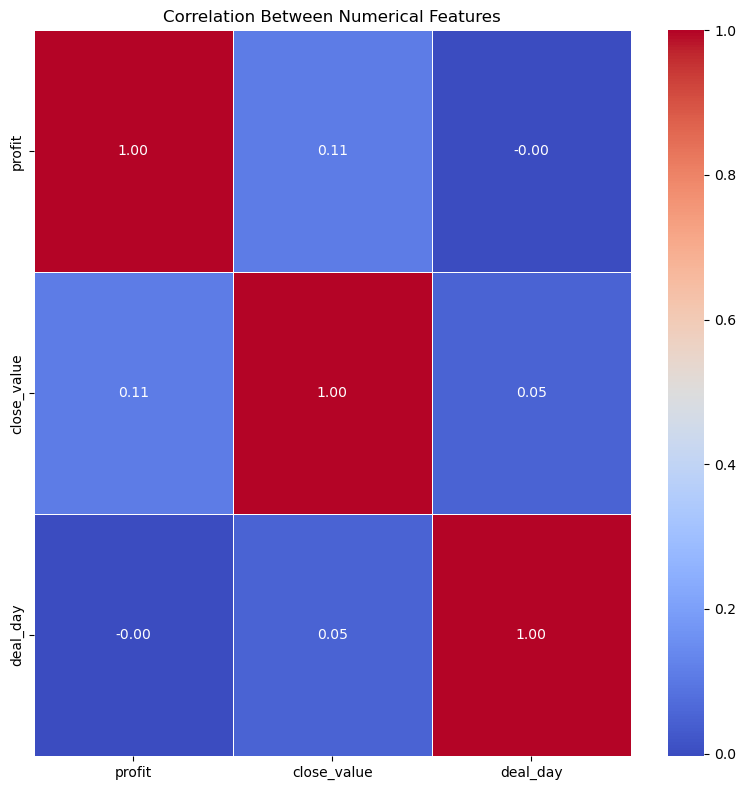

In [91]:
corr = deal[['profit','close_value','deal_day']].corr(method = 'pearson')

plt.figure(figsize = (8,8))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = .5)
plt.title('Correlation Between Numerical Features')
plt.tight_layout()
plt.show()

* Terlihat bahwa koefisien korelasi antara profit dan lamanya kesepakatan adalah 0. Hal ini menunjukan jika kedua faktor ini tidak memiliki korelasi.
* Terlihat bahwa koefisien korelasi antara revenue dan lamanya kesepakatan adalah 0.05 atau mendekati 0. Hal ini menunjukan jika kedua faktor ini tidak memiliki korelasi.

In [92]:
sales_pipeline2.head()

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,deal_day,close_value,profit
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,132.0,1054.0,-42.0
1,Z063OYW0,Darcel Schlecht,GTX Pro,Isdom,Won,2016-10-25,2017-03-11,137.0,4514.0,-307.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,133.0,50.0,-5.0
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,135.0,588.0,38.0
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,128.0,517.0,-33.0


In [93]:
deal_stage_by_deal_day = sales_pipeline2[['deal_stage','deal_day']]
deal_stage_by_deal_day = deal_stage_by_deal_day[deal_stage_by_deal_day['deal_stage'].isin(['Won','Lost'])].reset_index(drop = True)

In [94]:
deal_stage_by_deal_day.head()

,deal_stage,deal_day
0,Won,132.0
1,Won,137.0
2,Won,133.0
3,Won,135.0
4,Won,128.0


In [95]:
deal_won = deal_stage_by_deal_day[deal_stage_by_deal_day['deal_stage']=='Won']['deal_day'].to_numpy()
deal_lost = deal_stage_by_deal_day[deal_stage_by_deal_day['deal_stage']=='Lost']['deal_day'].to_numpy()

result = ttest_ind(deal_won, deal_lost)

# result independent t-test between deal_stage & deal_day
df_result = pd.DataFrame({
    'deal_stage':['Won','Lost'],
    'N':[deal_won.shape[0],deal_lost.shape[0]],
    'Mean':[deal_won.mean(),deal_lost.mean()],
    'Std. Deviation':[deal_won.std(),deal_lost.std()],
    'Statistic': [9.989261874652652,np.nan],
    'P-Value':[2.4705514743931674e-23,np.nan],
    'DF' : [6709.0,np.nan]
})

df_result

,deal_stage,N,Mean,Std. Deviation,Statistic,P-Value,DF
0,Won,4238,51.781973,41.166745,9.989262,2.470551e-23,6709.0
1,Lost,2473,41.479175,40.033080,NaN,NaN,NaN


**Hipotesis:**

H0: Tidak terdapat perbedaan rata-rata antar kedua kelompok

H1: Terdapat perbedaan rata-rata antar kedua kelompok

**alpha:** 5%

**Interpretasi:**
Hasil uji menunjukan nilai pvalue < alpha, sehingga berhasil tolak H0. Artinya terdapat perbedaan rata-rata lamanya kesepakatan pembelian (deal_day) antara kelompok pembeli yang berhasil ('Won') dengan kelompok pembeli yang gagal ('Lost').

**Kesimpulan:**
diperoleh insight:
1. Menunjukan jika terdapat perbedaan waktu yang dihabiskan antara kesepakatan yang berhasil dan gagal.
2. Kesepakatan yang berhasil cenderung menghabiskan waktu lebih lama dibandingkan dengan kesepakatan yang gagal.

In [96]:
cor_cat = sales_pipeline2[['account','deal_stage']].merge(accounts[['account','revenue']])
cor_cat = cor_cat[cor_cat['deal_stage'].isin(['Won','Lost'])].reset_index(drop=True)

revenue_class = []
for i in range(len(cor_cat)):
    if cor_cat['revenue'][i] > 500:
        revenue_class.append('High')   # more than 500
    elif cor_cat['revenue'][i] >= 100:
        revenue_class.append('Medium') # 101 - 500
    else:
        revenue_class.append('Small') # less than 100

cor_cat['class'] = revenue_class

cat_crosstab = pd.crosstab(cor_cat['deal_stage'],cor_cat['class'])
res = chi2_contingency(cat_crosstab)

In [97]:
cat_crosstab

class,High,Medium,Small
deal_stage,,,
Lost,1985,307,181
Won,3367,524,347


In [98]:
# deal_stage vs class account by revenue
print('Statistics:',res.statistic)
print('P-value:',res.pvalue)

Statistics: 1.6326820403924853
P-value: 0.4420461369127907


**H0** : Tidak terdapat korelasi

**H1** : Terdapat korelasi

**alpha** = 5%

**Interpretasi:**
Nilai p-value korelasi antara hasil kesepakatan pembelian dan kelas perusahaan berdasarkan revenue tahunan adalah 0.44 > nilai alpha. Hal ini menunjukan jika kedua variabel tersebut tidak saling berkorelasi.

In [99]:
cor_cat2 = sales_pipeline2[['account','deal_stage']].merge(accounts[['account','office_location']])
cor_cat2 = cor_cat2[cor_cat2['deal_stage'].isin(['Won','Lost'])].reset_index(drop=True)

cat_crosstab2 = pd.crosstab(cor_cat2['deal_stage'],cor_cat2['office_location'])
res2 = chi2_contingency(cat_crosstab2)

In [100]:
cat_crosstab2.T

deal_stage,Lost,Won
office_location,,
Belgium,41,63
Brazil,20,32
China,15,33
Germany,14,37
Italy,33,54
Japan,29,46
Jordan,29,52
Kenya,33,53
Korea,82,111


In [101]:
# deal_stage vs class account by revenue
print('Statistics:',res2.statistic)
print('P-value:',res2.pvalue)

Statistics: 14.419837188900123
P-value: 0.41892402118480226


**H0** : Tidak terdapat korelasi

**H1** : Terdapat korelasi

**alpha** = 5%

**Interpretasi:**
Nilai p-value korelasi antara hasil kesepakatan pembelian dan lokasi perusahaan adalah 0.42 > nilai alpha. Hal ini menunjukan jika kedua variabel tersebut tidak saling berkorelasi.

## Statistical Analysis

In [102]:
sales_pipeline2[sales_pipeline2['opportunity_id']=='XBVFZ1IR']

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,deal_day,close_value,profit
1144,XBVFZ1IR,Gladys Colclough,GTX Plus Basic,Cancity,Won,2017-02-27,2017-06-24,117.0,1008.0,-88.0


In [103]:
accounts[accounts['account']=='Cancity']

,account,sector,year_established,revenue,employees,office_location,subsidiary_of
8,Cancity,retail,2001,718.62,2448,United States,NaN


In [104]:
df_cek = sales_pipeline2[['opportunity_id','deal_stage', 'engage_date', 'close_date', 'product', 'account']].merge(accounts[['revenue','account']])
df_cek = df_cek.merge(products[['product','sales_price']])
#df_cek = df_cek[df_cek['deal_stage'].isin(['Won','Lost'])].reset_index(drop = True)
#df_cek['deal_day'] = (df_cek['close_date'] - df_cek['engage_date']).dt.days

In [105]:
df_cek

,opportunity_id,deal_stage,engage_date,close_date,product,account,revenue,sales_price
0,1C1I7A6R,Won,2016-10-20,2017-03-01,GTX Plus Basic,Cancity,718.62,1096
1,88POGNEL,Lost,2016-12-19,2017-03-07,GTX Plus Basic,Cancity,718.62,1096
2,XBVFZ1IR,Won,2017-02-27,2017-06-24,GTX Plus Basic,Cancity,718.62,1096
3,PEPOKEFV,Lost,2017-04-26,2017-08-01,GTX Plus Basic,Cancity,718.62,1096
4,RHOZIG9P,Lost,2017-05-28,2017-06-13,GTX Plus Basic,Cancity,718.62,1096
...,...,...,...,...,...,...,...,...
7370,CQZSFN7C,Lost,2017-06-17,2017-08-15,GTK 500,Konex,7708.38,26768
7371,6WIQG92N,Lost,2017-10-05,2017-10-18,GTK 500,Konex,7708.38,26768
7372,1LY8CAXD,Engaging,2017-09-27,NaT,GTK 500,Betasoloin,251.41,26768
7373,OBBVVO9O,Lost,2017-03-20,2017-05-27,GTK 500,Singletechno,2214.94,26768


In [106]:
# sales_pipeline ['deal_stage', 'engage_date', 'close_date', 'product', 'account']
# accounts ['revenue','office_location','account']
# products ['product','sales_price']

df = sales_pipeline2[['deal_stage', 'engage_date', 'close_date', 'product', 'account']].merge(accounts[['revenue','account']])
df = df.merge(products[['product','sales_price']])
df = df[df['deal_stage'].isin(['Won','Lost'])].reset_index(drop = True)
df['deal_day'] = (df['close_date'] - df['engage_date']).dt.days


revenue_class = []
for i in range(len(df)):
    if df['revenue'][i] > 500:
        revenue_class.append('High')   # more than 500
    elif cor_cat['revenue'][i] >= 100:
        revenue_class.append('Medium') # 101 - 500
    else:
        revenue_class.append('Small') # less than 100

df['class_revenue'] = revenue_class
df = df.drop(['product','account','engage_date','close_date','revenue'], axis = 1)

In [107]:
df.head()

,deal_stage,sales_price,deal_day,class_revenue
0,Won,1096,132,High
1,Lost,1096,78,High
2,Won,1096,117,High
3,Lost,1096,97,High
4,Lost,1096,16,High


In [108]:
for i in range(len(df)):
    if df['deal_stage'][i] == 'Won':
        df['deal_stage'][i] = 1
    else:
        df['deal_stage'][i] = 0

df['deal_stage'] = df['deal_stage'].astype('int')
class_revenue_encode = pd.get_dummies(df['class_revenue'], prefix = 'class_revenue', dtype = int)
df = pd.concat([df,class_revenue_encode], axis = 1)
df = df.drop(['class_revenue','class_revenue_Small'],axis = 1)

In [109]:
df.head()

,deal_stage,sales_price,deal_day,class_revenue_High,class_revenue_Medium
0,1,1096,132,1,0
1,0,1096,78,1,0
2,1,1096,117,1,0
3,0,1096,97,1,0
4,0,1096,16,1,0


In [110]:
import statsmodels.formula.api as smf

X = df[['sales_price','deal_day','class_revenue_High','class_revenue_Medium']].to_numpy()
y = df['deal_stage'].to_numpy()

#x_sm = sm.add_constant(X)
logit_model = smf.logit(data = df, formula = 'deal_stage ~ sales_price + deal_day + class_revenue_High + class_revenue_Medium')
result_sm = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.650685
         Iterations 4


In [111]:
print(result_sm.summary())

                           Logit Regression Results                           
Dep. Variable:             deal_stage   No. Observations:                 6711
Model:                          Logit   Df Residuals:                     6706
Method:                           MLE   Df Model:                            4
Date:                Tue, 21 May 2024   Pseudo R-squ.:                 0.01135
Time:                        20:07:03   Log-Likelihood:                -4366.7
converged:                       True   LL-Null:                       -4416.9
Covariance Type:            nonrobust   LLR p-value:                 8.814e-21
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.3550      0.217      1.635      0.102      -0.071       0.780
sales_price          -3.806e-06   1.01e-05     -0.377      0.706   -2.36e-05     1.6e-05
deal_day    

**Hipotesis:**

H0: Variabel independen berpengaruh terhadap variabel dependen

H1: Variabel independen tidak berpengaruh terhadap variabel dependen

**alpha:** 5%

**Interpretasi:**
* Variabel `sales_price` memiliki nilai P>|z| = 0.706 > alpha. Sehingga H0 gagal tolak
* Variabel `deal_day` memiliki nilai P>|z| = 0.000 < alpha. Sehingga H0 berhasil tolak
* Variabel `class_revenue_High` memiliki nilai P>|z| = 0.619 > alpha. Sehingga H0 gagal tolak
* Variabel `class_revenue_Medium` memiliki nilai P>|z| = 0.767 > alpha. Sehingga H0 gagal tolak

Berdasarkan informasi di atas, hanya variabel `deal_day` yang berpengaruh terhadap `deal_stage`. Hal ini juga dapat dibuktikan menggunakan nilai Pseudo R-squ. = 0.01135 atau hanya 1.14% `deal_stage` dapat dijelaskan oleh variabel independen yang digunakan dalam pemodelan, sisanya sebesar 98.86% dijelaskan oleh variabel lain yang tidak digunakan.

# Insight & Recommendations

## Insight

### 1. Bagaimana karakteristik pelanggan saat membeli produk?

* Top 10 perusahaan yang menghasilkan revenue terbesar: (United States) Kan-code, Konex, Condax, Cheers, Goodsilron, Treequote, Warephase, Xx-holding, dan Isdom. (Korea) Hottechi.
* Top 10 perusahaan yang menghasilkan profit terbesar: (United States) Groovestreet, Treequote, Vehement Capital Partners, dambase, Toughzap, Acme Corporation, Doncon, Cheers, dan Iselectrics. (Brazil) Nam-zim.
* Renevue terbesar dihasilkan oleh perusahaan asal United States. Sementara profit terbesar dihasilkan oleh Brazil, China, Philipines, dan Panama, sedangkan wilayah lain menghasilkan kerugian.
* Revenue terbesar berasal dari sektor retail, teknologi, medis, dan software.

### 2. Bagaimana kinerja tim penjualan?

* Dari 30 karyawan penjualan, hanya 14 karyawan yang menghasilkan keuntungan. Dengan keuntungan terbesar dihasilkan oleh Daniell Hammack.
* Dari 6 tim penjualan, hanya 2 tim yang menghasilkan keuntungan yaitu tim yang dipegang manager Rocco Neubert dan Melvin Marxen.
* Hanya kantor pemasaran yang berada di East yang menghasilkan profit, sementara lainnya mengalami kerugian.

### 3. Seperti apa tren dan kondisi penjualan perusahaan?

* Terjadi penurunan revenue di setiap awal bulan per triwulan dan akan terus meningkat hingga bulan terakhir per triwulan.
* Selama tahun 2017, pada semester pertama cenderung mengalami kerugian. Sementara di semester kedua menjelang akhir tahun cenderung mengalami profit.
* Hampir semua produk menghasilkan rata-rata profit bernilai negatif (rugi).
* Dari 6,711 penjualan, sebesar 63% yang berhasil menghasilkan kesepakatan dengan pembeli.
* Kesepakatan penjualan produk dengan pembeli pada kategori berhasil cenderung membutuhkan waktu lebih lama dibandingkan dengan yang gagal.
* Berdasarkan fitur yang ada hanya lamanya hari kesepakatan yang berpengaruh terhadap hasil kesepakatan penjualan.

### 4. Apakah ada produk yang berpotensi untuk menjadi produk unggulan atau apakah ada produk yang memiliki nilai jual kurang?

* Terdapat 3 produk yang menghasilkan revenue di atas 1 juta USD antara lain GTX Pro, GTX Plus Pro, dan MG Advanced. Sementara produk yang menghasilkan revenue paling rendah adalah MG Special.
* Hanya terdapat 2 produk dengan profit positif yaitu GTX Plus Pro dan MG Special.
* Produk GTX Plus Basic dan GTX Basic memiliki potensi Lost lebih besar dibandingkan produk lainnya.

## Recommendations

1. Perusahaan dapat memfokuskan penjualan dan menjaga hubungan baik dengan customer yang berasal dari wilayah United States. Di sisi lain, perlu meningkatkan penjualan dan pelayanan dengan customer yang berasal dari wilayah Brazil, China, Philipines, dan Panama, sehingga akan meningkatkan profit perusahaan.
2. Identifikasi produk yang memiliki potensi profitabilitas tinggi seperti GTX Plus Pro dan MG Special serta fokus untuk memasarkan produk-produk tersebut untuk meningkatkan revenue dan profit.
3. Melakukan perbaikan kualitas atau penyesuaian harga dengan harga yang diterima pasar pada produk GTX Plus Basic dan GTX Basic sehingga dapat meningkatkan peluang keberhasilan dalam menjual produk-produk tersebut.
4. Optimalkan proses penjualan produk dengan memberikan pelatihan untuk tim penjualan, peningkatan komunikasi tim penjualan dengan customer, dan memanfaatkan penggunalan alat CRM yang efektif sehingga dapat mengurangi/mempercepat proses kesepakatan dengan customer.
5. Dengan memahami pola atau siklus penjualan yang terjadi setiap triwulan, perusahaan dapat menyesuaikan strategi penjualan dan pemasaran untuk meningkatkan revenue di awal bulan per triwulan.
6. Melakukan penyesuaian dan kontrol biaya serta melakukan pemasaran yang lebih agresif di awal tahun untuk meningkatkan revenue dan profit.
7. Memberikan reward bagi karyawan yang berhasil menghasilkan profit bagi perusahaan sehingga dapat mendorong kinerja karyawan dan menjadi contoh bagi karyawan lain.
8. Mengevaluasi kembali kinerja karyawan dengan melakukan pelatihan dan pengembangan tambahan bagi karyawan yang gagal dalam mencapai target penjualan.
9. Replikasi strategi pemasaran di East ke lokasi lain agar dapat meningkatkan profitabilitas perusahaan dengan tetap mempertimbangkan dan menyesuaikan dengan kondisi dan situasi di setiap wilayah.